# Prediction of the Popularity of Online articles


After starting to read my project, I would have to say that I've inpired by the steps to solve this kind of problems from some projects in github but the analysis and the results are completely mine  

# Importing libraries 

In [448]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from IPython.display import display

import re, datetime

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from scipy.stats import randint

import seaborn as sns

sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'

# Read the data 

In [449]:
data = pd.read_csv("OnlineNewsPopularity.csv",sep='\s*,\s*')

C:\Users\Yassine\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


This parameter (sep='\s*,\s*') servs to read the spaces in column-names

In [450]:
data.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  
0                      0.187500     593  
1                      0.000000     711  
2                      0.000000    1500  
3                      0.000000    1200  
4                      0.136364     505  

[5 rows x 61 columns]

In fact, we can remove the "URL" and "timedelta" columns from the data because they are relevent for the prediction

# Check if there is any null value in the data 

In [451]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

With this function, we could say that there are no Null Values in the data and we can also know the type of any feature.
    

In [452]:
#another way :
data.isnull().values.any()

False

# The dimension of the dataset

In [453]:
data.shape

(39644, 61)

# Check if there is any inappropriate values in the data (negative value in positive feature for example)

In [454]:
#for now we can work without url column so we can drop it
data2=data.copy()
data2.drop(['url'],axis=1, inplace=True)

In [455]:
j=1
for i in data2.columns:
    if any(x < 0 for x in data2[i])==True:
        print(j, data.columns[j])
    j=j+1

19 kw_min_min
21 kw_avg_min
25 kw_min_avg
45 global_sentiment_polarity
53 avg_negative_polarity
54 min_negative_polarity
55 max_negative_polarity
57 title_sentiment_polarity


In [456]:
data2.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.625739      4.000000   
50%            1.000000                  0.690476      8.000000   
75%            1.000000                  0.754630     14.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  min_positive_polarity  \
count    39644.000000  39644.000000  39644.000000  ...           39644.000000   
mean         3.293638      4.544143      1.249874  ...               0.095446   
std          3.855141      8.309434      4.107855  ...               0.071315   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.050000   
50%          3.000000      1.000000      0.000000  ...               0.100000   
75%          4.000000      4.000000      1.000000  ...               0.100000   
max        116.000000    128.000000     91.000000  ...               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000               0.000000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
count           39644.000000        39644.000000              39644.000000   
mean               -0.107500            0.282353                  0.071425   
std                 0.095373            0.324247                  0.265450   
min                -1.000000            0.000000                 -1.000000   
25%                -0.125000            0.000000                  0.000000   
50%                -0.100000            0.150000                  0.000000   
75%                -0.050000            0.500000                  0.150000   
max                 0.000000            1.000000                  1.000000   

       abs_title_subjectivity  abs_title_sentiment_polarity         shares  
count            39644.000000                  39644.000000   39644.000000  
mean                 0.341843                      0.156064    3395.380184  
std                  0.188791                      0.226294   11626.950749  
min                  0.000000                      0.000000       1.000000  
25%                  0.166667                      0.000000     946.000000  
50%                  0.500000                      0.000000    1400.000000  
75%                  0.500000                      0.250000    2

In [457]:
data2=data.copy()

# Detecting outliers

# Graphically

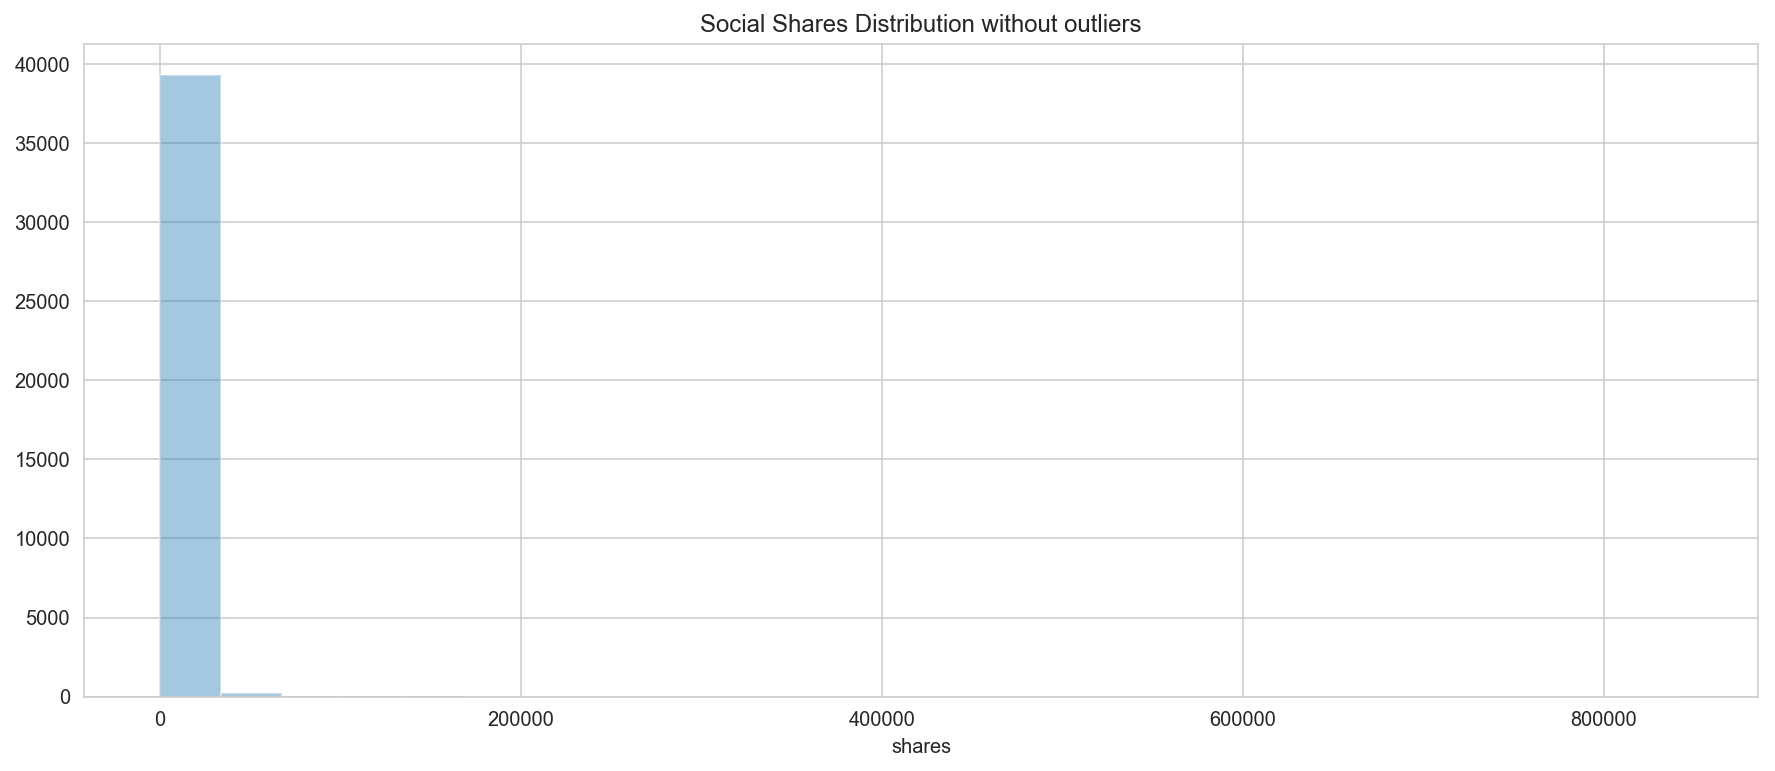

In [458]:
#we plot the histogram of shares
plt.xlabel('Shares')
plt.title('Social Shares Distribution without outliers')
sns.distplot(data2.shares,kde=False, bins=25)

We can note that the distribution of shares columns is not normal and skewed

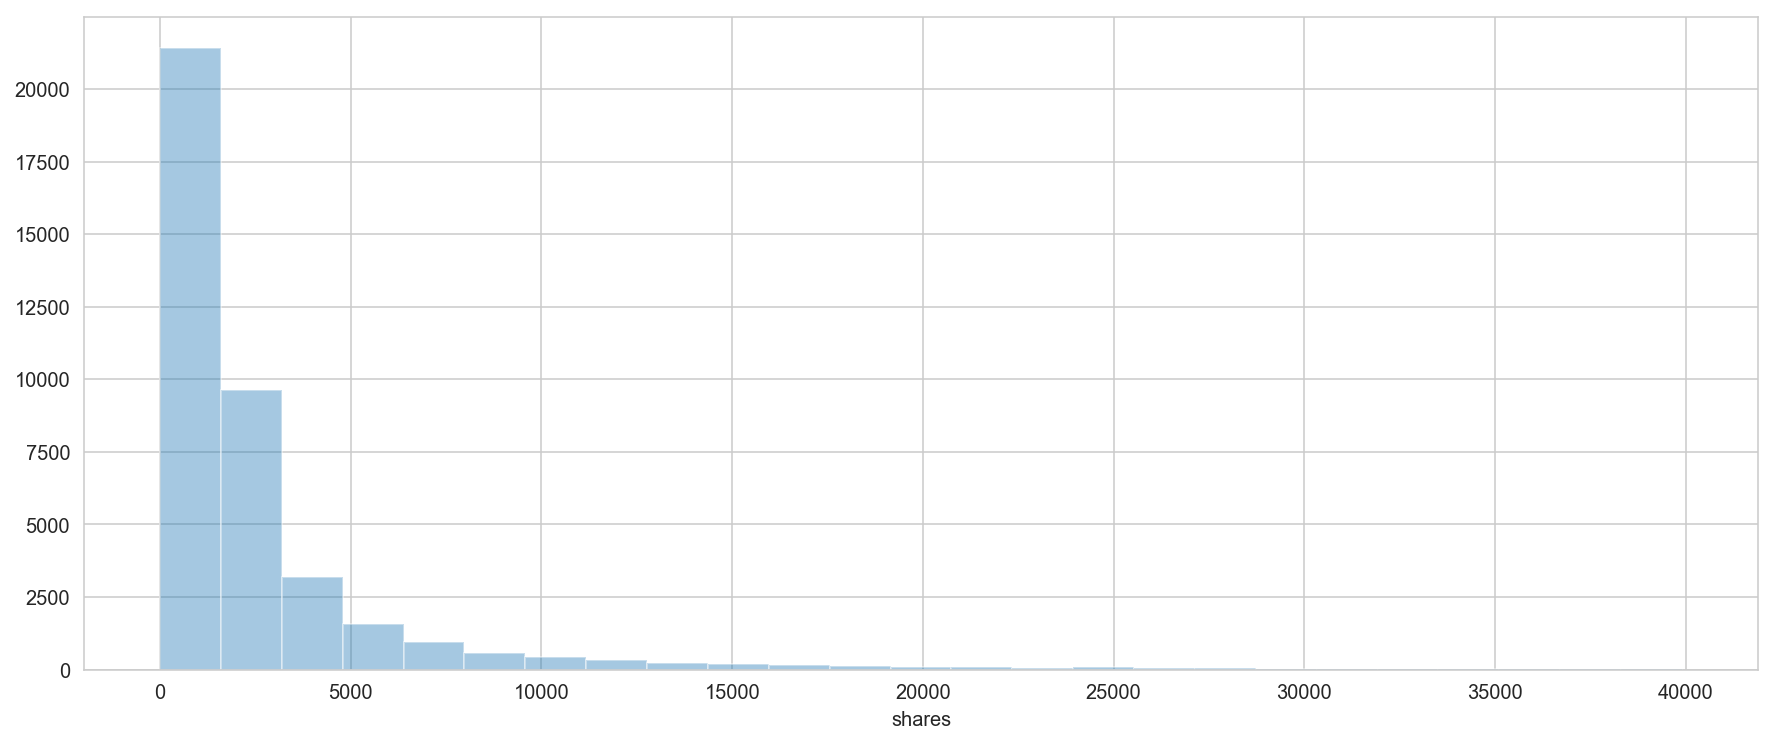

In [459]:
sns.distplot(data2[data2.shares < 40000].shares,kde=False, bins=25)

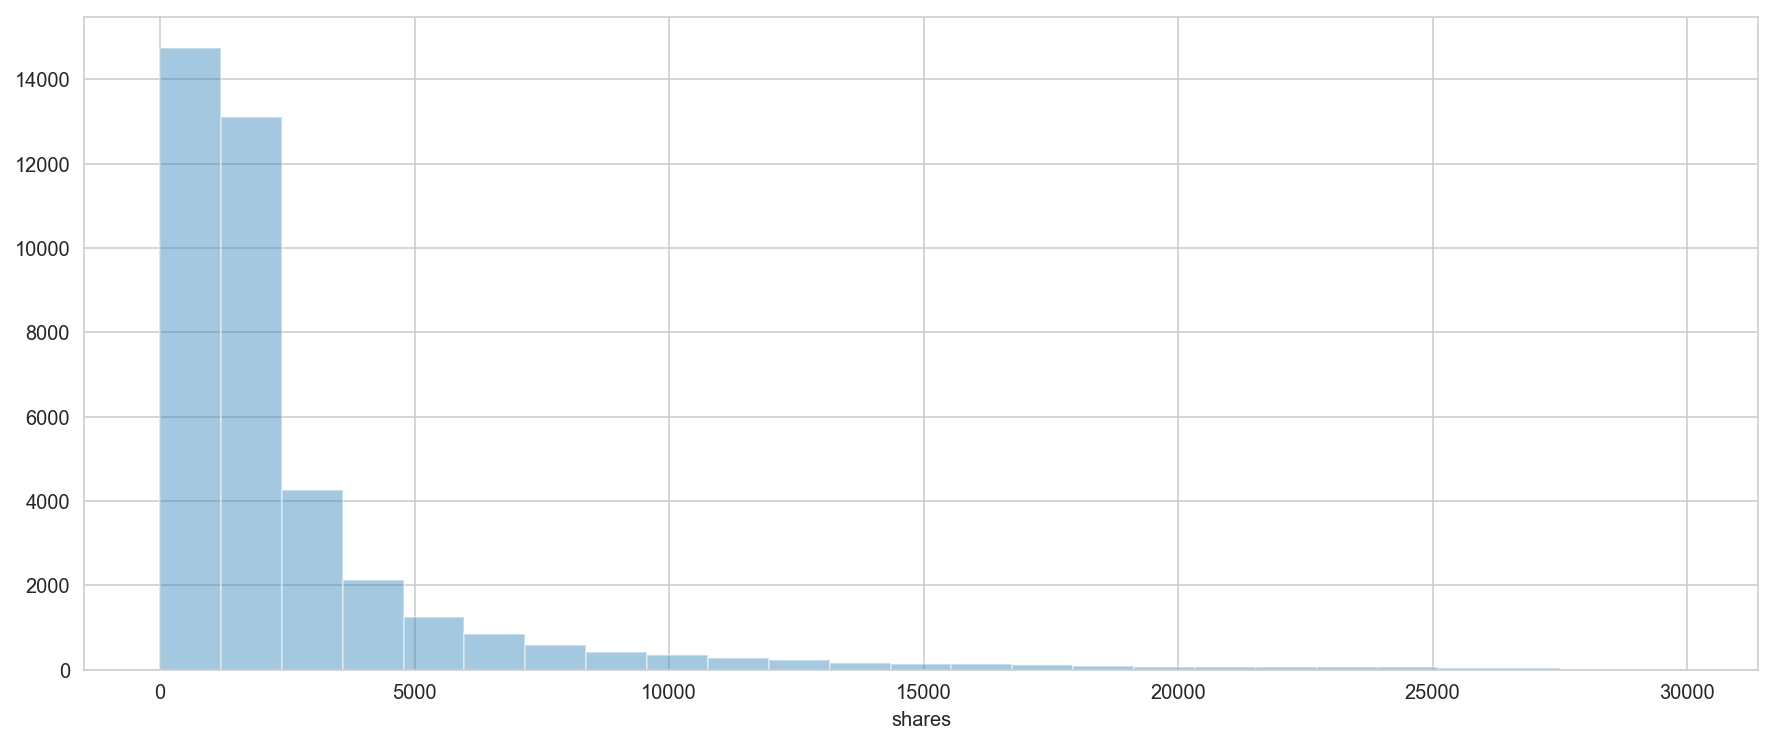

In [460]:
sns.distplot(data2[data2.shares < 30000].shares,kde=False, bins=25)

Perfect !

As we can see, there is some outliers that we can get rid of (we take >30000 as hypothesis)

# With plotbox

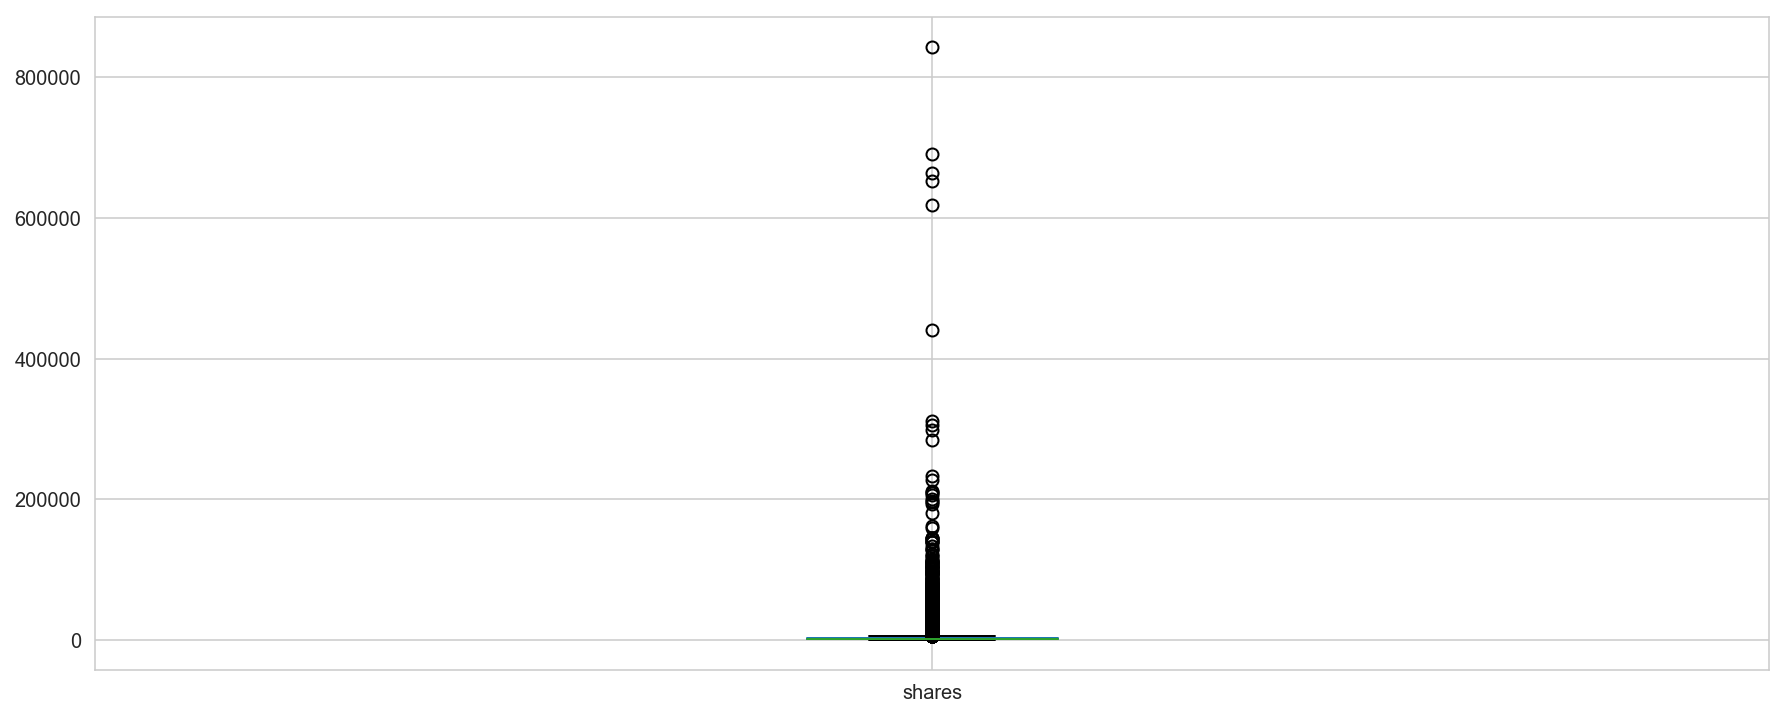

In [461]:
data2.boxplot(column='shares')

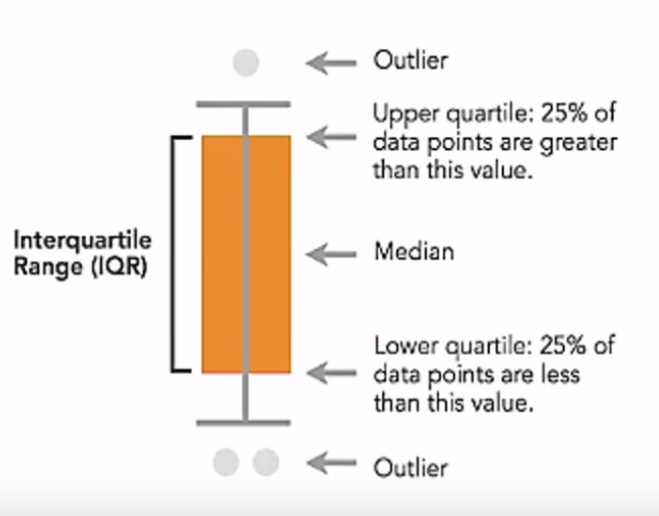

In [462]:
from IPython.display import Image
Image(filename='Capture.png',width=400, height=400)


source : https://www.youtube.com/watch?v=nbNiD76yE8o

As we can see, there is some outliers showed in the boxplot.

Our approach is to remove the outlier points by eliminating any points that are above (mean + 2*sd) and any points below (mean - 2*sd). First, we need to convert the shares column into log(shares) so that we can have a normal distribuation)

In [463]:
data2["shares_log"]=np.log1p(data2["shares"])

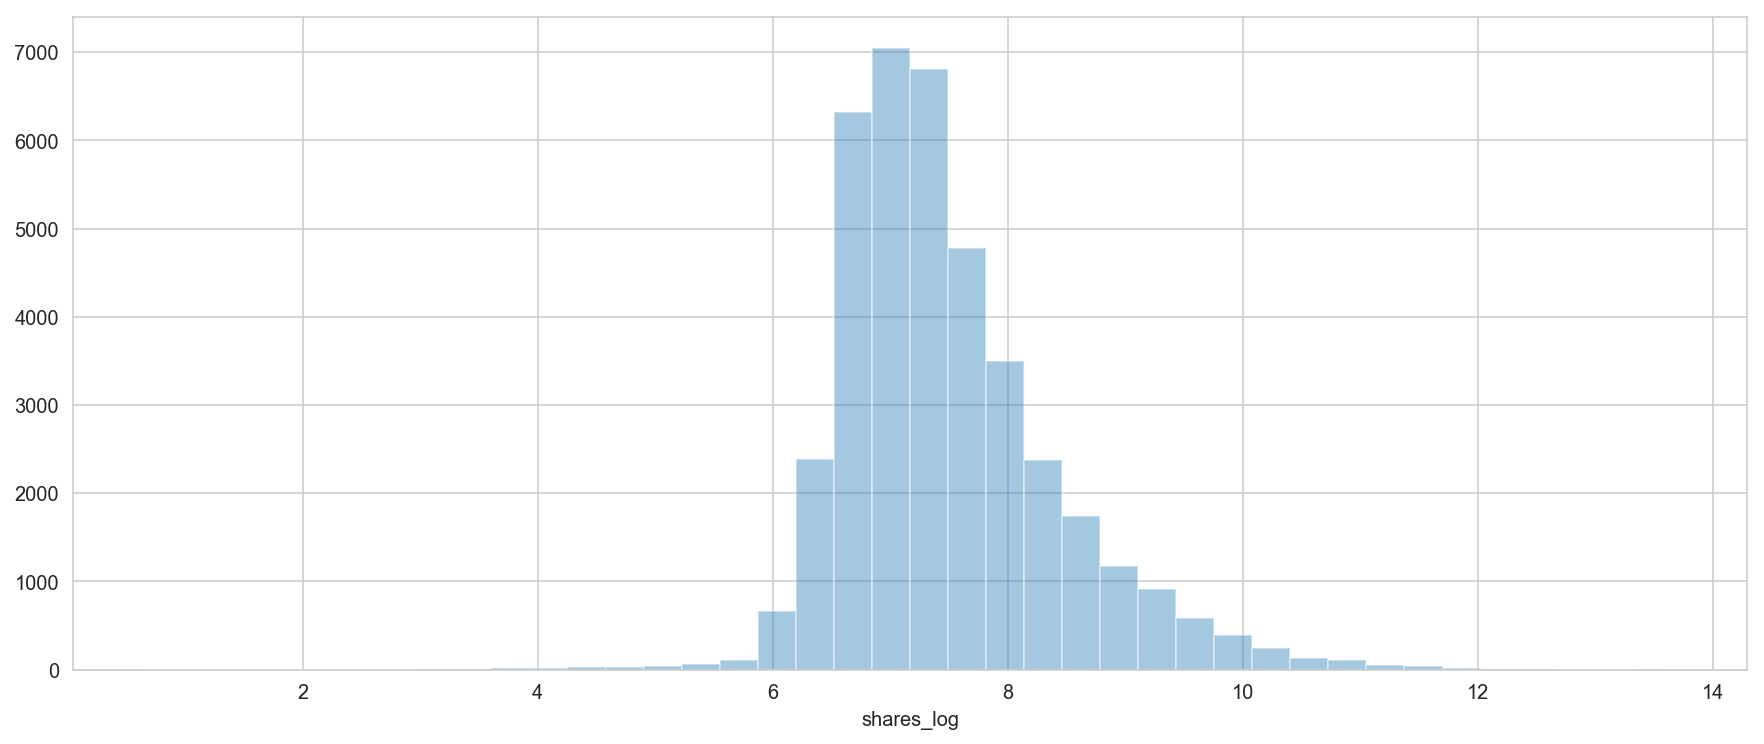

In [464]:
#We zoom in the histogram 
sns.distplot(data2.shares_log, bins = 40, norm_hist=False, kde=False)
plt.show()

In [465]:
print(np.mean(data2['shares_log']), np.median(data2['shares_log']))

7.47569154065131 7.244941546337007


So its almost a normal distribution =) (mean ~ median)

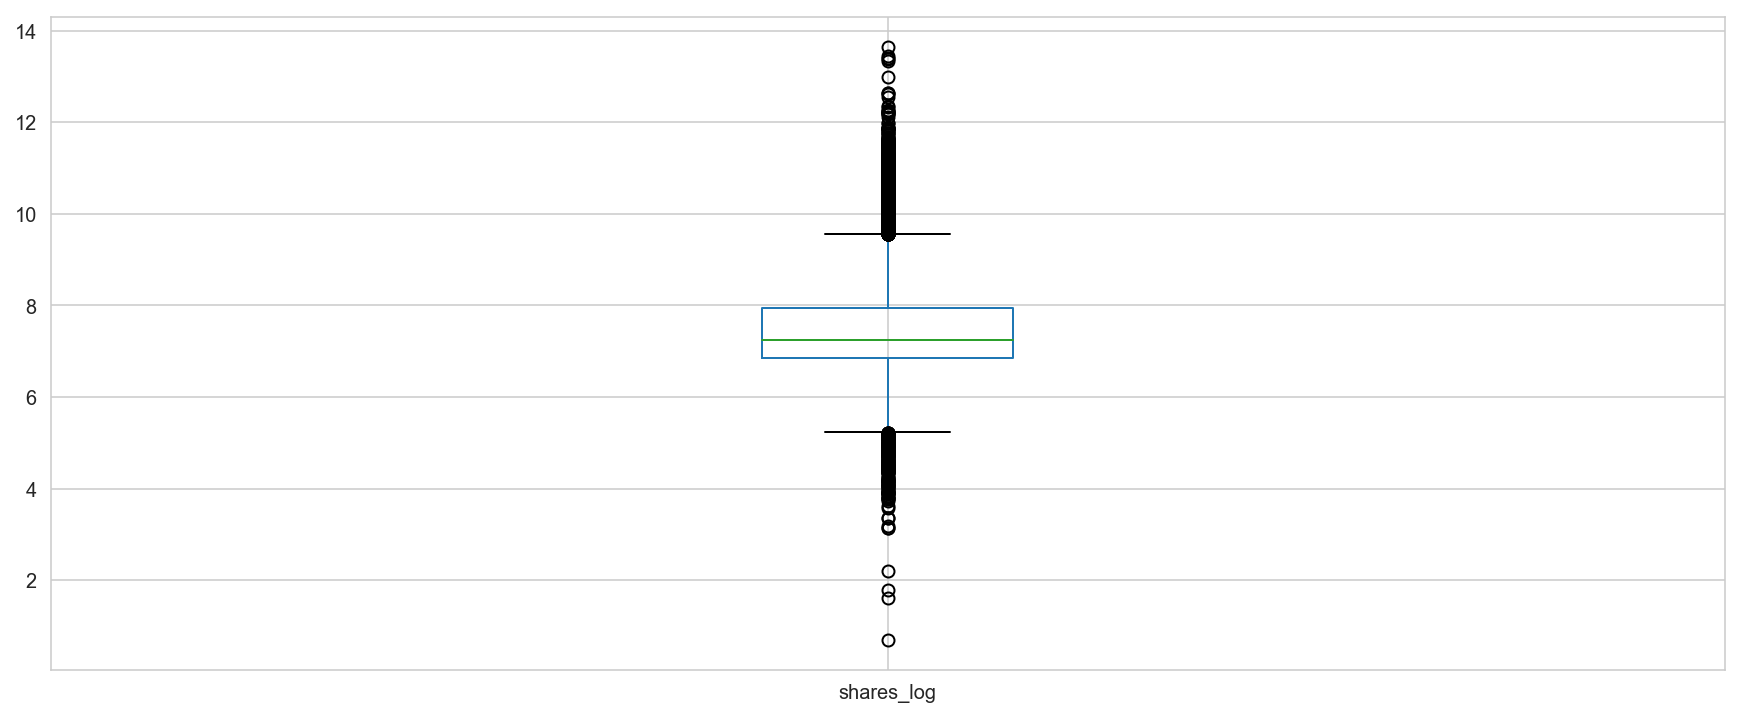

In [466]:
#The boxplot of the normal distribution version (the outliers are above and bellow the bares)
data2.boxplot(column='shares_log')

In this way, we can see the outliers easally 

the shape :  (39130, 1)
the max of the shares :  26600


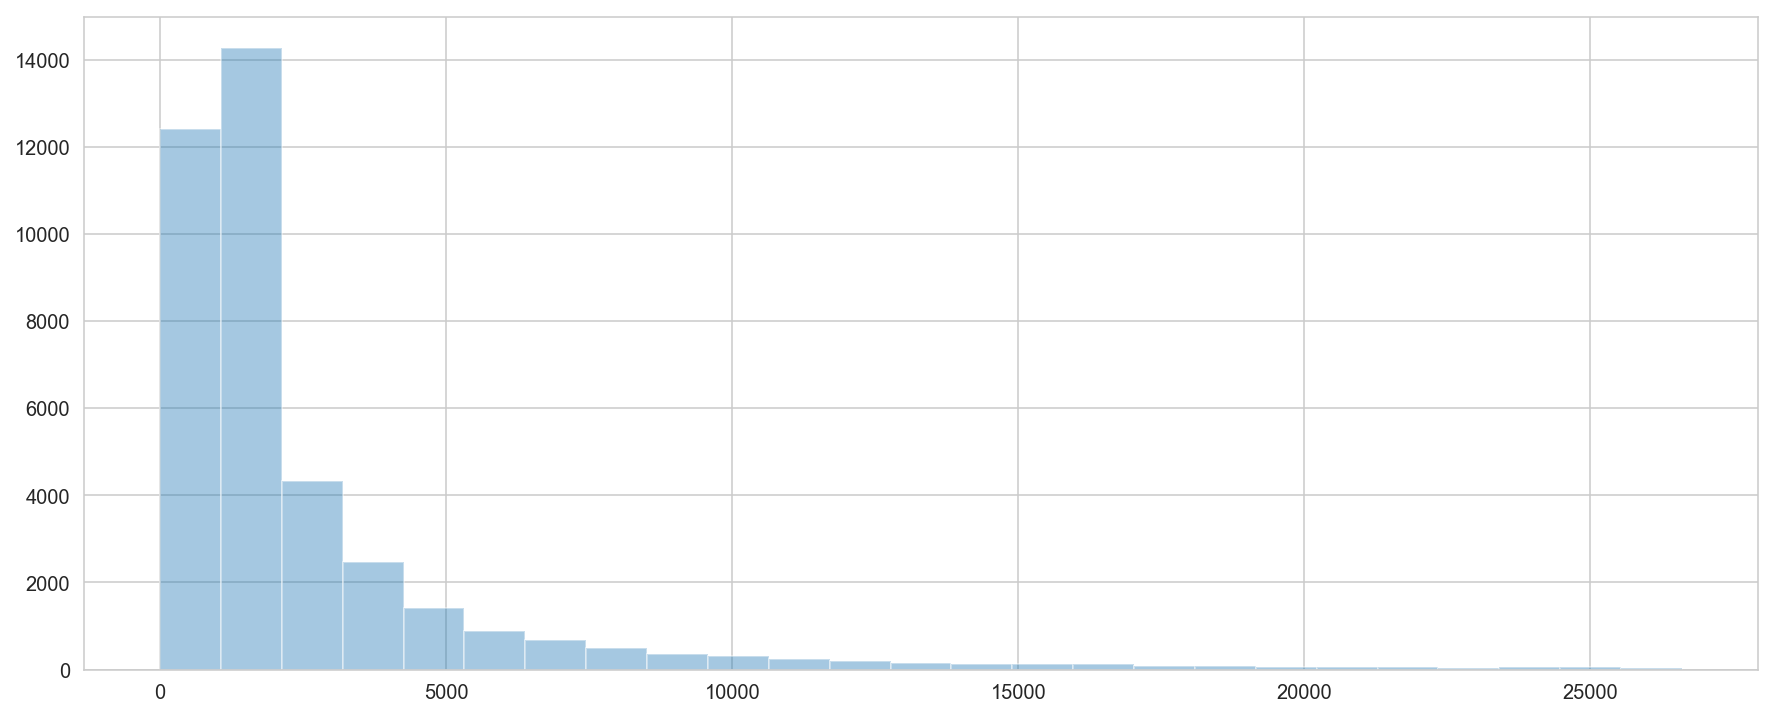

In [467]:
#get rid of the outliers
mean = np.mean(data2['shares'])
std = np.std(data2['shares'])
shares_without_outliers = [v for v in (data2['shares']) if (v < mean + 2 * std)]

sns.distplot(shares_without_outliers,kde=False, bins=25)


data_shares = pd.DataFrame(shares_without_outliers)
print("the shape : ",data_shares.shape)


print("the max of the shares : ", max(shares_without_outliers))


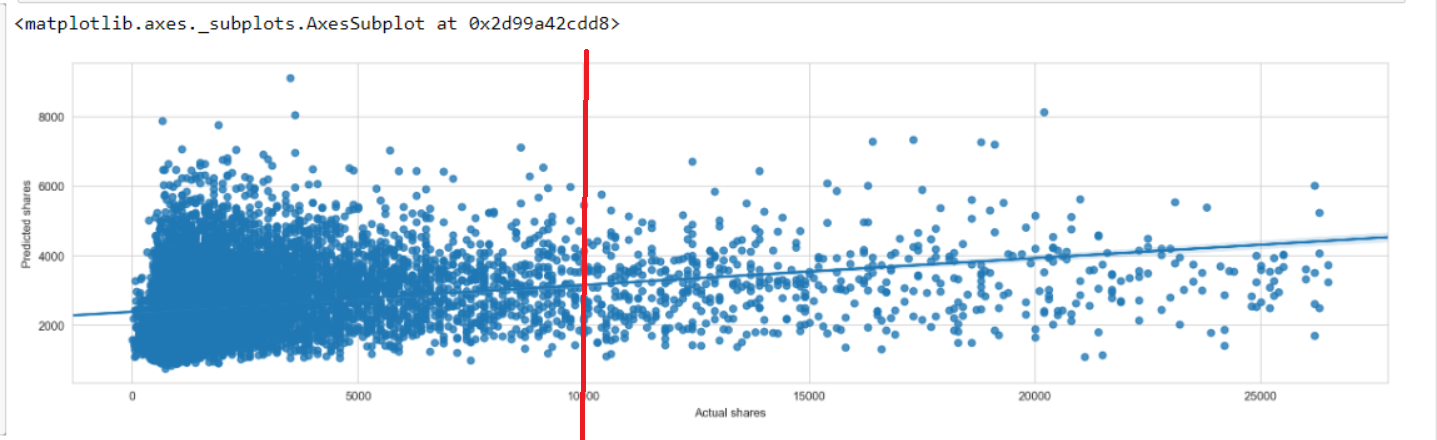

In [655]:
from IPython.display import Image
Image(filename='Capture4.png',width=900, height=900)

Thats why I've chosen 10000 instead of 26600 (I tried 20 000 and 15 000 but 10000 was the best max)

In [548]:
data2 = data2[data2['shares'] < 10000]
data2.shape

(37429, 63)

As we can see, we could reduce the data from 39640 to 37429 so almost 3% of the data are just outliers 

In [549]:
data2.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_log       date  
0                      0.187500     593    6.386879 2013-01-07  
1                      0.000000     711    6.568078 2013-01-07  
2                      0.000000    1500    7.313887 2013-01-07  
3                      0.000000    1200    7.090910 2013-01-07  
4                      0.136364     505    6.226537 2013-01-07  

[5 rows x 63 columns]

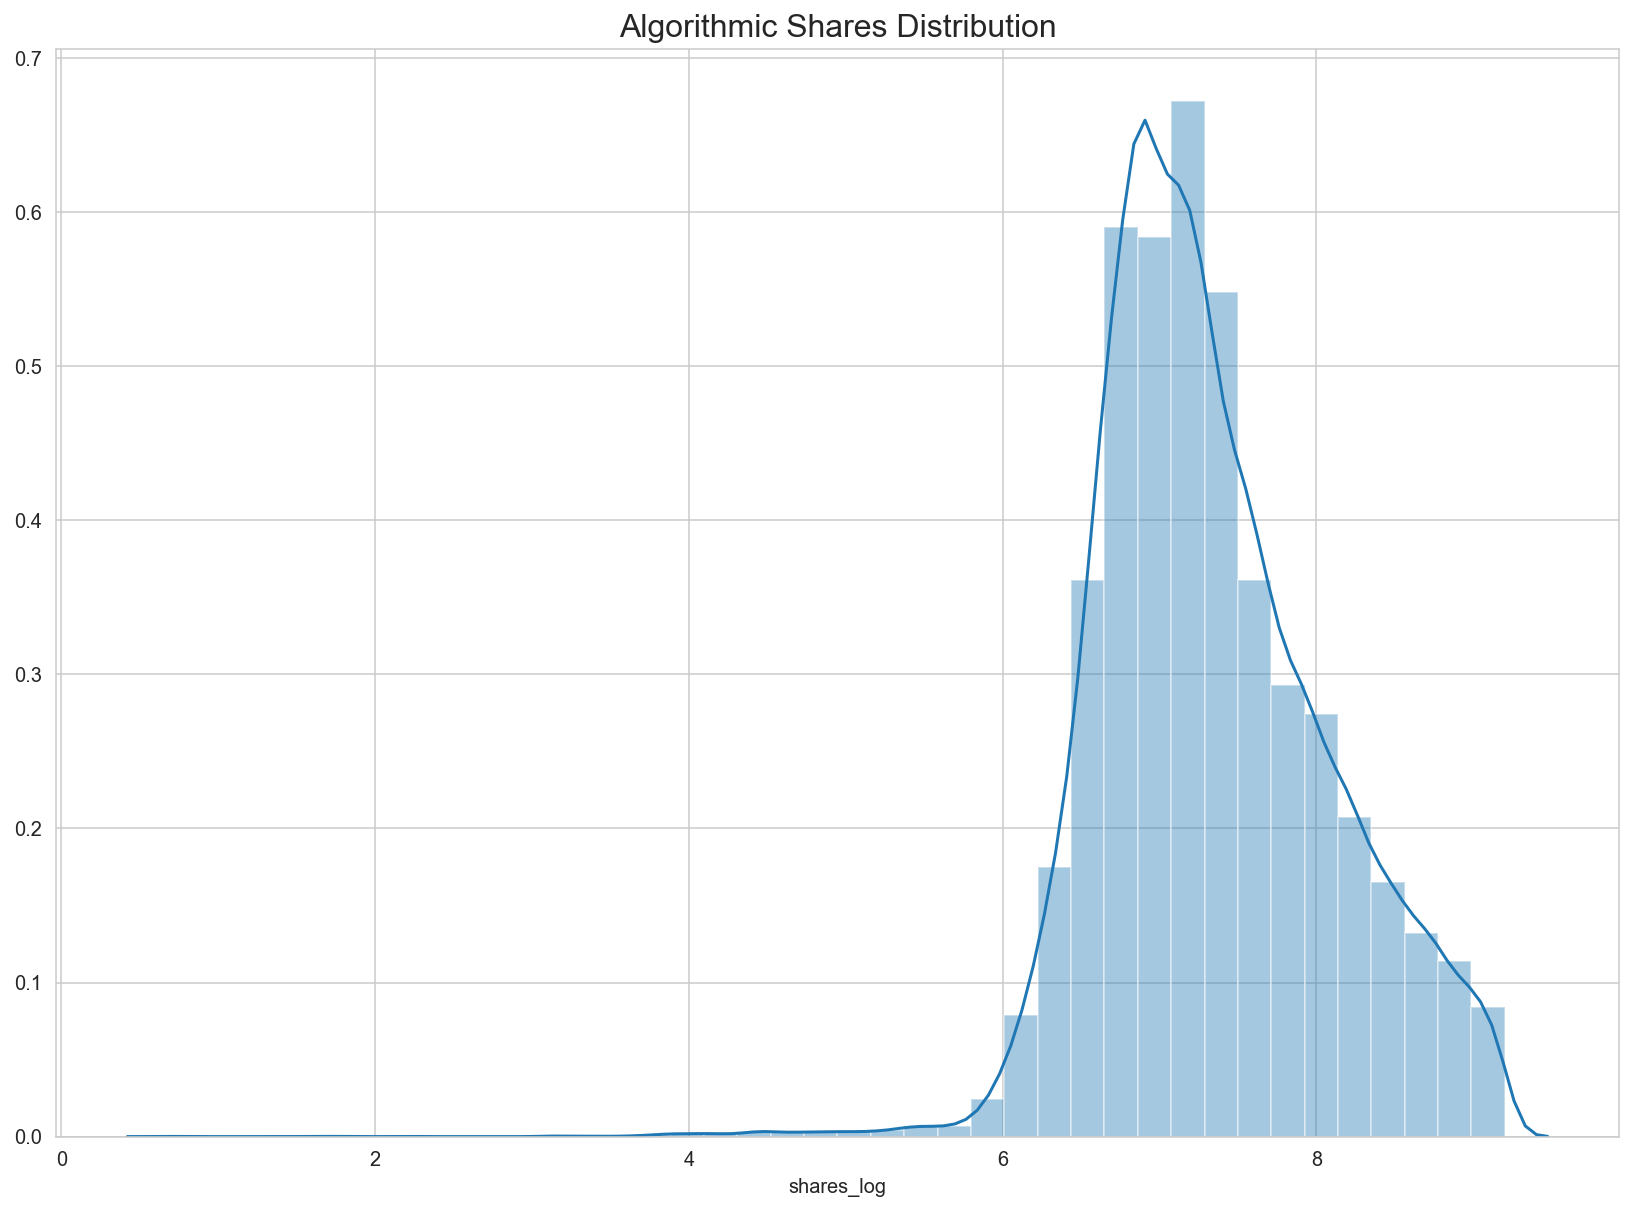

In [550]:
plt.figure(figsize = (14,10))
plt.title('Algorithmic Shares Distribution', fontsize = 16)
sns.distplot(data2.shares_log, bins = 40)
plt.show()

In [551]:
data2.describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  37429.000000    37429.000000      37429.000000     37429.000000   
mean     354.090812       10.396110        547.894520         0.549285   
std      214.924790        2.112443        466.970214         3.623177   
min        8.000000        2.000000          0.000000         0.000000   
25%      163.000000        9.000000        249.000000         0.470899   
50%      337.000000       10.000000        413.000000         0.538653   
75%      545.000000       12.000000        718.000000         0.607383   
max      731.000000       23.000000       7764.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      37429.000000              37429.000000  37429.000000   
mean           0.999145                  0.691015     10.719923   
std            5.383532                  3.359729     11.072233   
min            0.000000                  0.000000      0.000000   
25%            1.000000                  0.626486      4.000000   
50%            1.000000                  0.690667      7.000000   
75%            1.000000                  0.754386     13.000000   
max         1042.000000                650.000000    304.000000   

       num_self_hrefs      num_imgs    num_videos  ...  max_positive_polarity  \
count    37429.000000  37429.000000  37429.000000  ...           37429.000000   
mean         3.300275      4.423442      1.210639  ...               0.755822   
std          3.854216      8.178818      4.008505  ...               0.246669   
min          0.000000      0.000000      0.000000  ...               0.000000   
25%          1.000000      1.000000      0.000000  ...               0.600000   
50%          3.000000      1.000000      0.000000  ...               0.800000   
75%          4.000000      4.000000      1.000000  ...               1.000000   
max        116.000000    128.000000     75.000000  ...               1.000000   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
count           37429.000000           37429.000000           37429.000000   
mean               -0.258272              -0.520341              -0.107097   
std                 0.126837               0.289715               0.094545   
min                -1.000000              -1.000000              -1.000000   
25%                -0.326304              -0.700000              -0.125000   
50%                -0.251709              -0.500000              -0.100000   
75%                -0.185943              -0.300000              -0.050000   
max                 0.000000               0.000000               0.000000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
count        37429.000000              37429.000000            37429.000000   
mean             0.279167                  0.070082                0.341915   
std              0.322279                  0.262139                0.188988   
min              0.000000                 -1.000000                0.000000   
25%              0.000000                  0.000000                0.166667   
50%              0.125000                  0.000000                0.500000   
75%              0.500000                  0.136364                0.500000   
max              1.000000                  1.000000                0.500000   

       abs_title_sentiment_polarity        shares    shares_log  
count                  37429.000000  37429.000000  37429.000000  
mean                       0.153610   2022.382538      7.333052  
std                        0.223678   1758.059454      0.726457  
min                        0.000000      1.000000      0.693147  
25%                        0.000000    925.000000      6.830874  
50%                        0.000000   1400.000000      7.244942  
75%                        0.250000   2400.000000      7.783641  
max                        1.000000   9900.000000      9.200391  


Now we can work with this new data without outliers

# A quick study of features 

# Categorical Features : 

In [552]:
categorical_features = ["data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
"data_channel_is_socmed","data_channel_is_tech","data_channel_is_world",
'weekday_is_monday','weekday_is_tuesday',"weekday_is_wednesday","weekday_is_thursday",
"weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend"]

In [553]:
categorical_data = data2[[col for col in data2.columns if col in categorical_features]]
print(categorical_data.shape)
categorical_data.head()

(37429, 14)


data_channel_is_lifestyle  data_channel_is_entertainment  \
0                        0.0                            1.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            1.0   
4                        0.0                            0.0   

   data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                  0.0                     0.0                   0.0   
1                  1.0                     0.0                   0.0   
2                  1.0                     0.0                   0.0   
3                  0.0                     0.0                   0.0   
4                  0.0                     0.0                   1.0   

   data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
0                    0.0                1.0                 0.0   
1                    0.0                1.0                 0.0   
2                    0.0                1.0                 0.0   
3                    0.0                1.0                 0.0   
4                    0.0                1.0                 0.0   

   weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                   0.0                  0.0                0.0   
1                   0.0                  0.0                0.0   
2                   0.0                  0.0                0.0   
3                   0.0                  0.0                0.0   
4                   0.0                  0.0                0.0   

   weekday_is_saturday  weekday_is_sunday  is_weekend  
0                  0.0                0.0         0.0  
1                  0.0                0.0         0.0  
2                  0.0                0.0         0.0  
3                  0.0                0.0         0.0  
4                  0.0                0.0         0.0

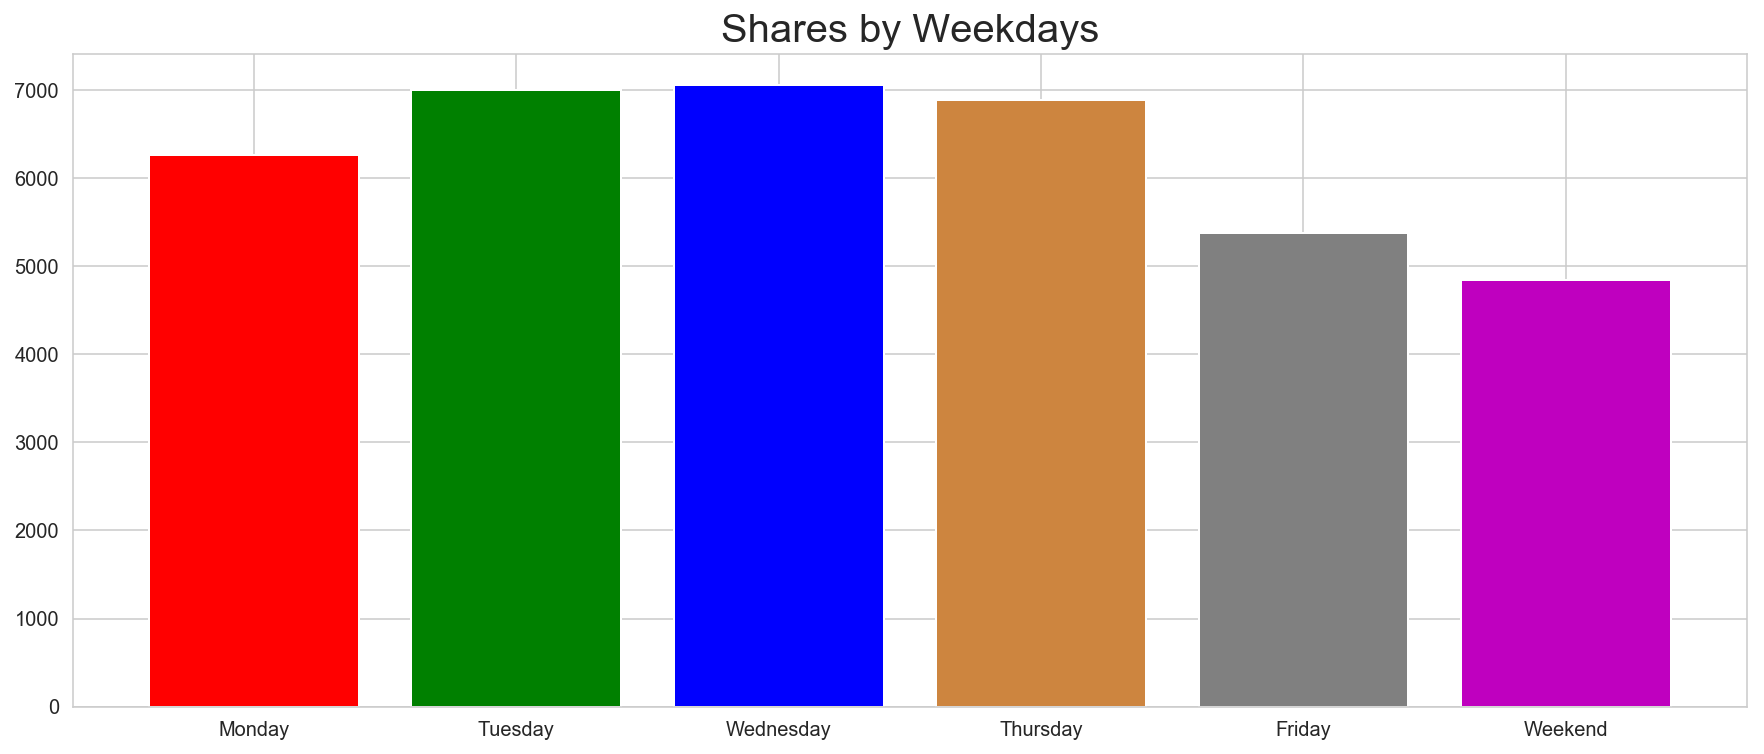

In [554]:
colors = ["r","g","b","peru","grey","m",'y']    
plt.title('Shares by weekday', fontsize = 20)
Monday = data2[data2['weekday_is_monday']== 1].shares.count()
Tuesday = data2[data2['weekday_is_tuesday']== 1].shares.count()
Wednesday = data2[data2['weekday_is_wednesday']== 1].shares.count()
Thursday = data2[data2['weekday_is_thursday']== 1].shares.count()
Friday = data2[data2['weekday_is_friday']== 1].shares.count()
Weekend = data2[data2['is_weekend']== 1].shares.count()

Dict = {'Monday':Monday, 'Tuesday':Tuesday, 'Wednesday':Wednesday,'Thursday':Thursday, 'Friday':Friday, 'Weekend':Weekend}
colors = ["r","g","b","peru","grey","m"]
plt.bar(range(len(Dict)), Dict.values(), align='center', color=colors)
plt.xticks(range(len(Dict)), Dict.keys())
plt.title('Shares by Weekdays', fontsize = 20)
plt.show()

Shares are highest during the middle of the week and decrease during the weekends

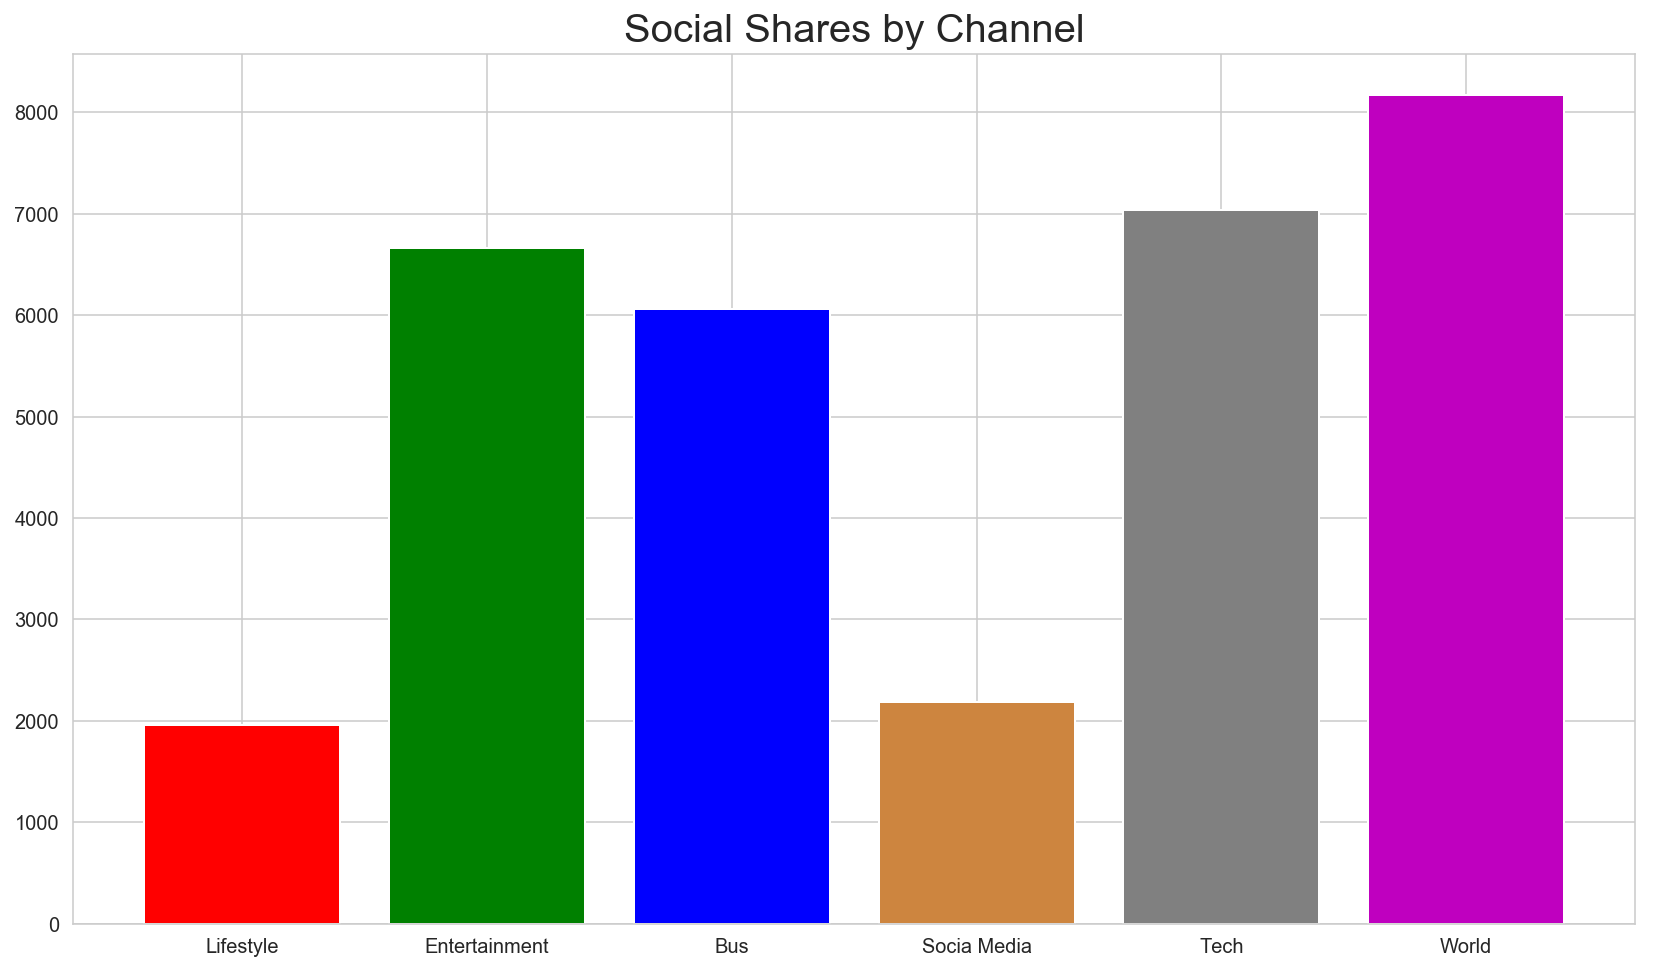

In [555]:
plt.figure(figsize = (14,8))

Lifestyle = data2[data2['data_channel_is_lifestyle']== 1].shares.count()
Entertainment = data2[data2['data_channel_is_entertainment']== 1].shares.count()
Bus = data2[data2['data_channel_is_bus']== 1].shares.count()
Socmed = data2[data2['data_channel_is_socmed']== 1].shares.count()
Tech = data2[data2['data_channel_is_tech']== 1].shares.count()
World = data2[data2['data_channel_is_world']== 1].shares.count()

Dict = {'Lifestyle':Lifestyle, 'Entertainment':Entertainment, 'Bus':Bus,'Socia Media':Socmed, 'Tech':Tech, 'World':World}
colors = ["r","g","b","peru","grey","m"]
plt.bar(range(len(Dict)), Dict.values(), align='center', color=colors)
plt.xticks(range(len(Dict)), Dict.keys())
plt.title('Social Shares by Channel', fontsize = 20)
plt.show()

The number of shares articles in World, Tech and Entertainment channels is hight, unlike Lifestyle and Social Media Channels 

# Numerical Feautures

In [556]:
num_data = data2[[col for col in data2.drop(columns=['shares','shares_log']).columns if col not in categorical_features]]
num_data.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0               0.100000                    0.7              -0.350000   
1               0.033333                    0.7              -0.118750   
2               0.100000                    1.0              -0.466667   
3               0.136364                    0.8              -0.369697   
4               0.033333                    1.0              -0.220192   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                 -0.600              -0.200000            0.500000   
1                 -0.125              -0.100000            0.000000   
2                 -0.800              -0.133333            0.000000   
3                 -0.600              -0.166667            0.000000   
4                 -0.500              -0.050000            0.454545   

   title_sentiment_polarity  abs_title_subjectivity  \
0                 -0.187500                0.000000   
1                  0.000000                0.500000   
2                  0.000000                0.500000   
3                  0.000000                0.500000   
4                  0.136364                0.045455   

   abs_title_sentiment_polarity       date  
0                      0.187500 2013-01-07  
1                      0.000000 2013-01-07  
2                      0.000000 2013-01-07  
3                      0.000000 2013-01-07  
4                      0.136364 2013-01-07  

[5 rows x 47 columns]

<function matplotlib.pyplot.show(*args, **kw)>

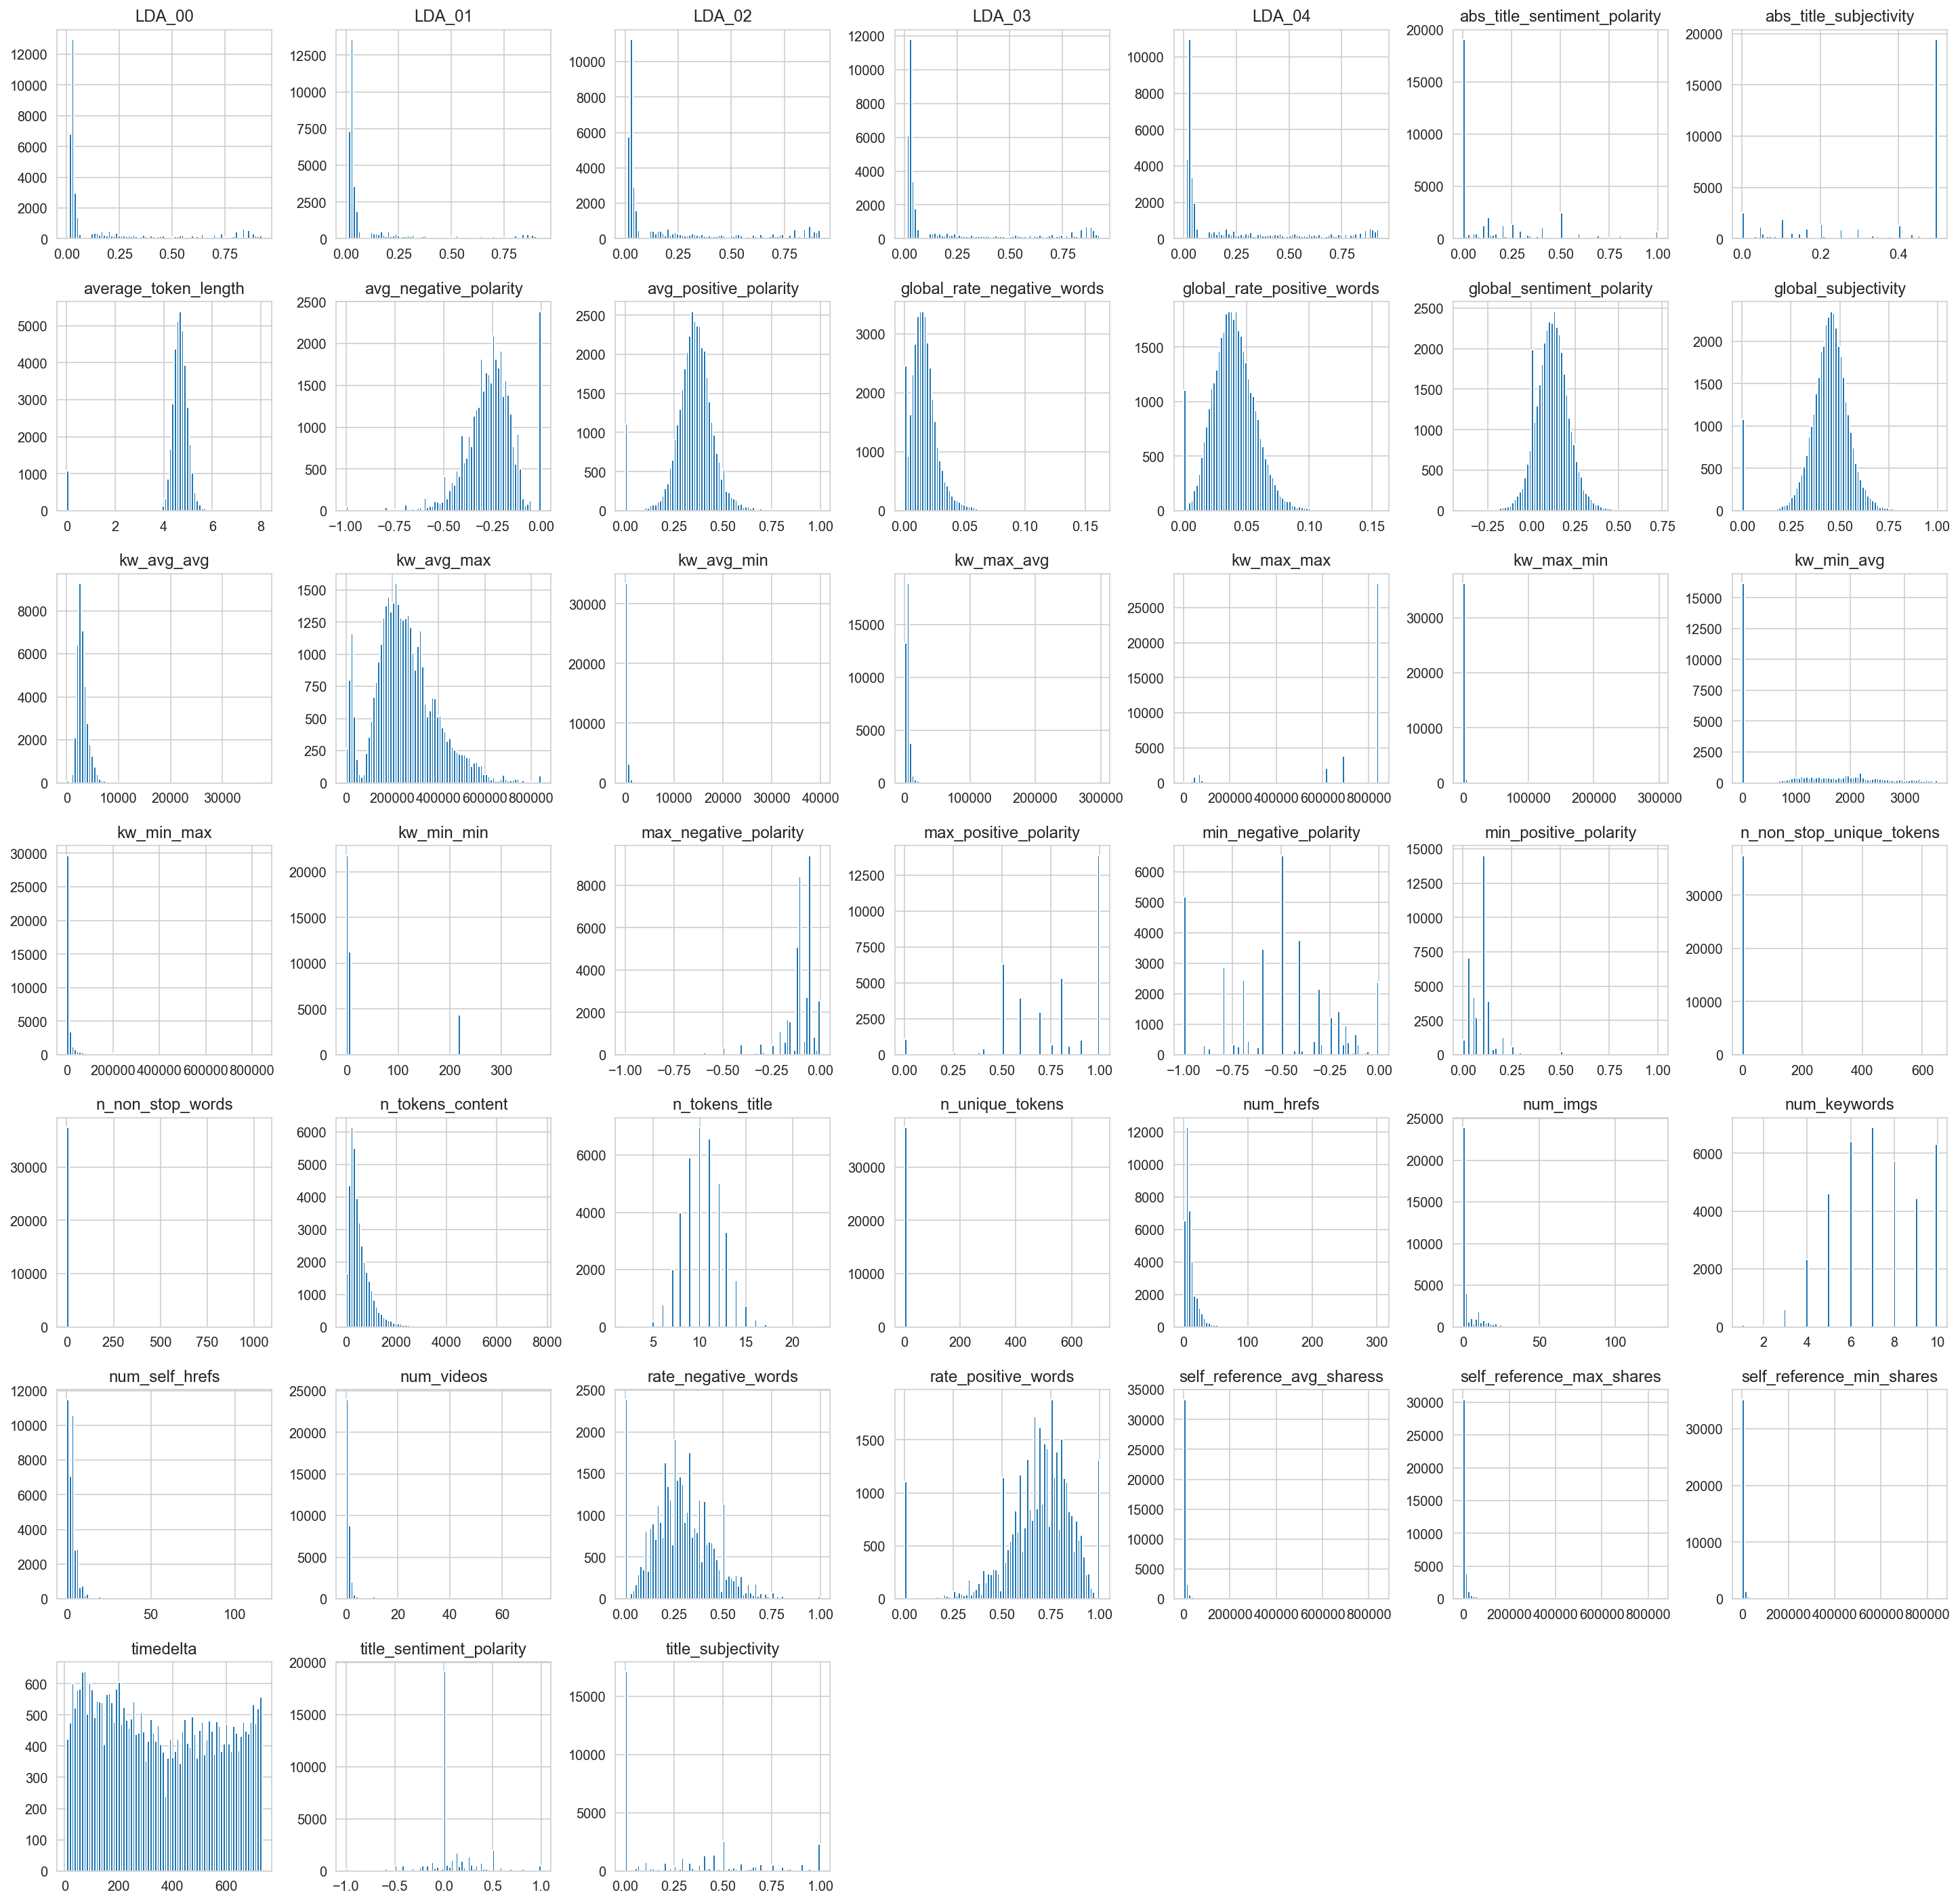

In [557]:
#distribution of numerical features :
num_data.hist(bins=80, figsize= (25,25))
plt.show

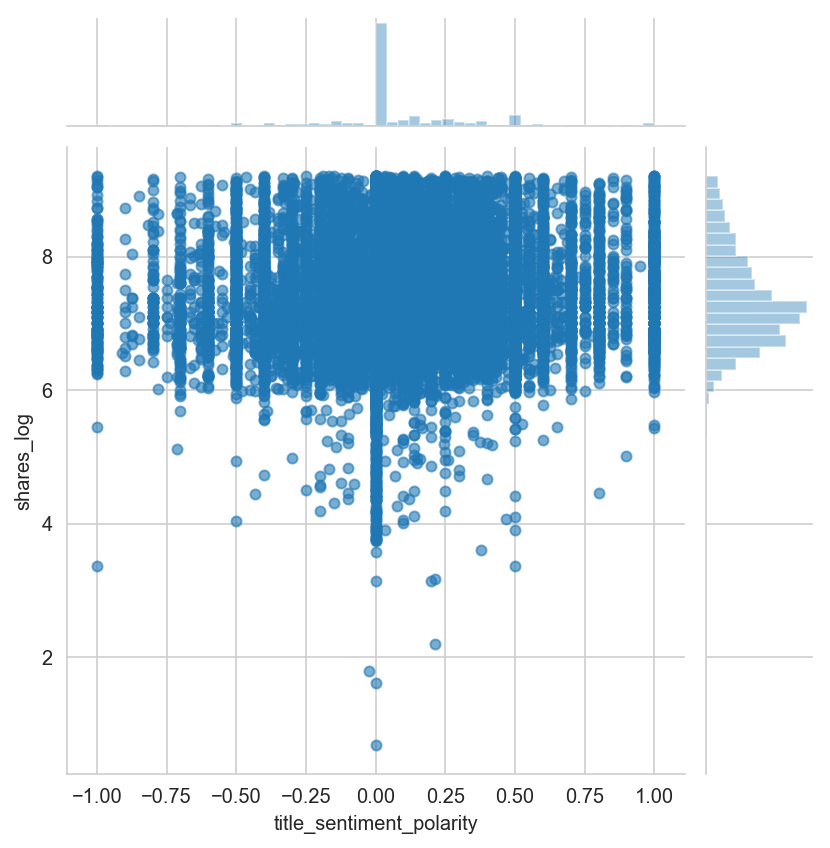

In [558]:
#The relationship between the polarity of the title and the log of shares 
sns.jointplot(data2.title_sentiment_polarity, data2.shares_log, joint_kws=dict(s=25, alpha=0.6))


The relationship here is positive 

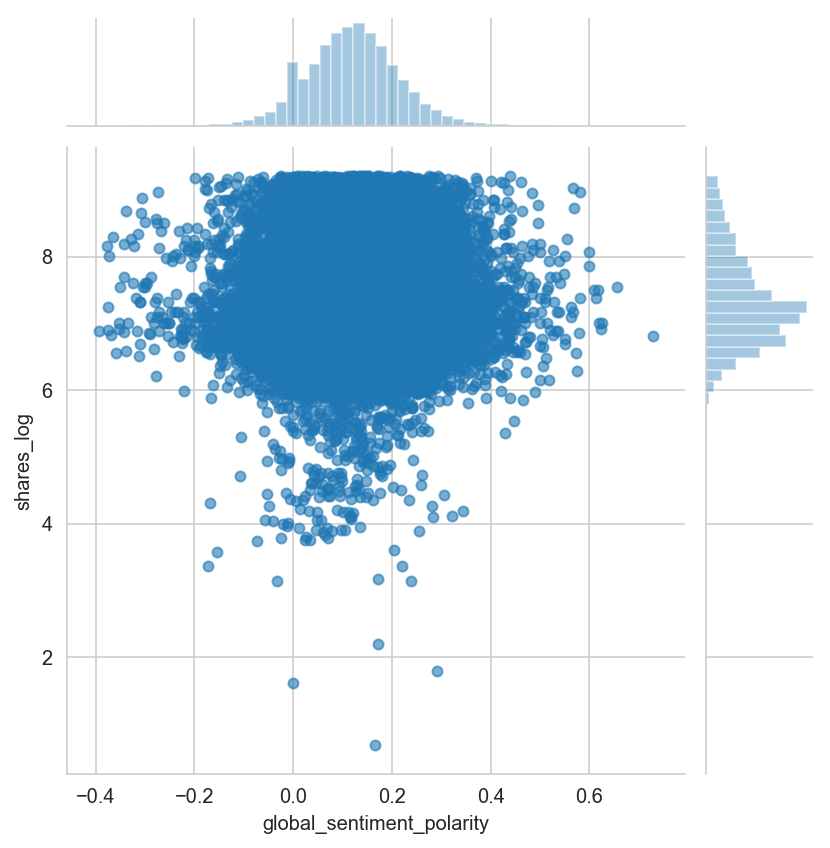

In [559]:
#The relationship between the global sentiment polarity and the log of shares 
sns.jointplot(data2.global_sentiment_polarity, data2.shares_log, joint_kws=dict(s=25, alpha=0.6))

This relationship is stronger than the previous one, and it looks like a positive linear relationship

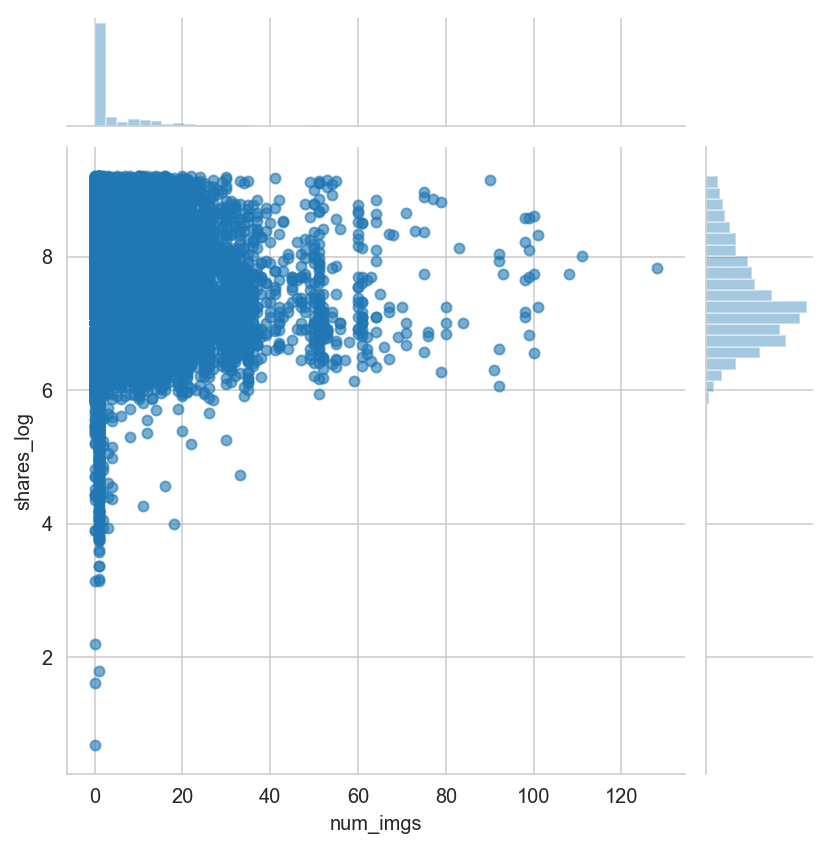

In [560]:
#The relationship between the number of images in the article and the log of shares 
sns.jointplot(data2.num_imgs,data2.shares_log, joint_kws=dict(s=25, alpha=0.6))
plt.show()

This relastionship is also relatively stong and positive and we can consider it as a linear relationship. From these analysis we can notice that these two last features could be presented in the predict session.

In [561]:
data_corr = data2.corr()   
data_corr.head()

timedelta  n_tokens_title  n_tokens_content  \
timedelta          1.000000       -0.238883         -0.068666   
n_tokens_title    -0.238883        1.000000          0.024591   
n_tokens_content  -0.068666        0.024591          1.000000   
n_unique_tokens    0.002380       -0.005402         -0.004038   
n_non_stop_words  -0.000454       -0.004681          0.017556   

                  n_unique_tokens  n_non_stop_words  n_non_stop_unique_tokens  \
timedelta                0.002380         -0.000454                  0.003144   
n_tokens_title          -0.005402         -0.004681                 -0.005481   
n_tokens_content        -0.004038          0.017556                  0.000841   
n_unique_tokens          1.000000          0.999599                  0.999863   
n_non_stop_words         0.999599          1.000000                  0.999563   

                  num_hrefs  num_self_hrefs  num_imgs  num_videos  ...  \
timedelta         -0.003165        0.063942 -0.025619   -0.004513  ...   
n_tokens_title    -0.048048       -0.010189 -0.003948    0.051952  ...   
n_tokens_content   0.426549        0.304551  0.348280    0.104814  ...   
n_unique_tokens   -0.004291        0.006825  0.020308   -0.000741  ...   
n_non_stop_words   0.005286        0.013540  0.029800   -0.001012  ...   

                  max_positive_polarity  avg_negative_polarity  \
timedelta                      0.092880               0.005550   
n_tokens_title                -0.016477              -0.018701   
n_tokens_content               0.418756              -0.133517   
n_unique_tokens               -0.010294               0.002511   
n_non_stop_words               0.000487              -0.000323   

                  min_negative_polarity  max_negative_polarity  \
timedelta                      0.069003              -0.061240   
n_tokens_title                -0.033253               0.013319   
n_tokens_content              -0.454296               0.226785   
n_unique_tokens                0.010551              -0.006509   
n_non_stop_words              -0.000285              -0.000180   

                  title_subjectivity  title_sentiment_polarity  \
timedelta                  -0.016836                  0.037771   
n_tokens_title              0.080800                  0.002447   
n_tokens_content            0.005238                  0.021417   
n_unique_tokens            -0.004786                 -0.002286   
n_non_stop_words           -0.005427                 -0.001589   

                  abs_title_subjectivity  abs_title_sentiment_polarity  \
timedelta                       0.010991                     -0.002960   
n_tokens_title                 -0.148419                      0.043830   
n_tokens_content                0.009075                      0.013422   
n_unique_tokens                -0.009480                     -0.004256   
n_non_stop_words               -0.008716                     -0.004369   

                    shares  shares_log  
timedelta         0.026576    0.021249  
n_tokens_title   -0.032206   -0.034875  
n_tokens_content  0.033261    0.045385  
n_unique_tokens   0.009701    0.007549  
n_non_stop_words  0.010515    0.008915  

[5 rows x 61 columns]

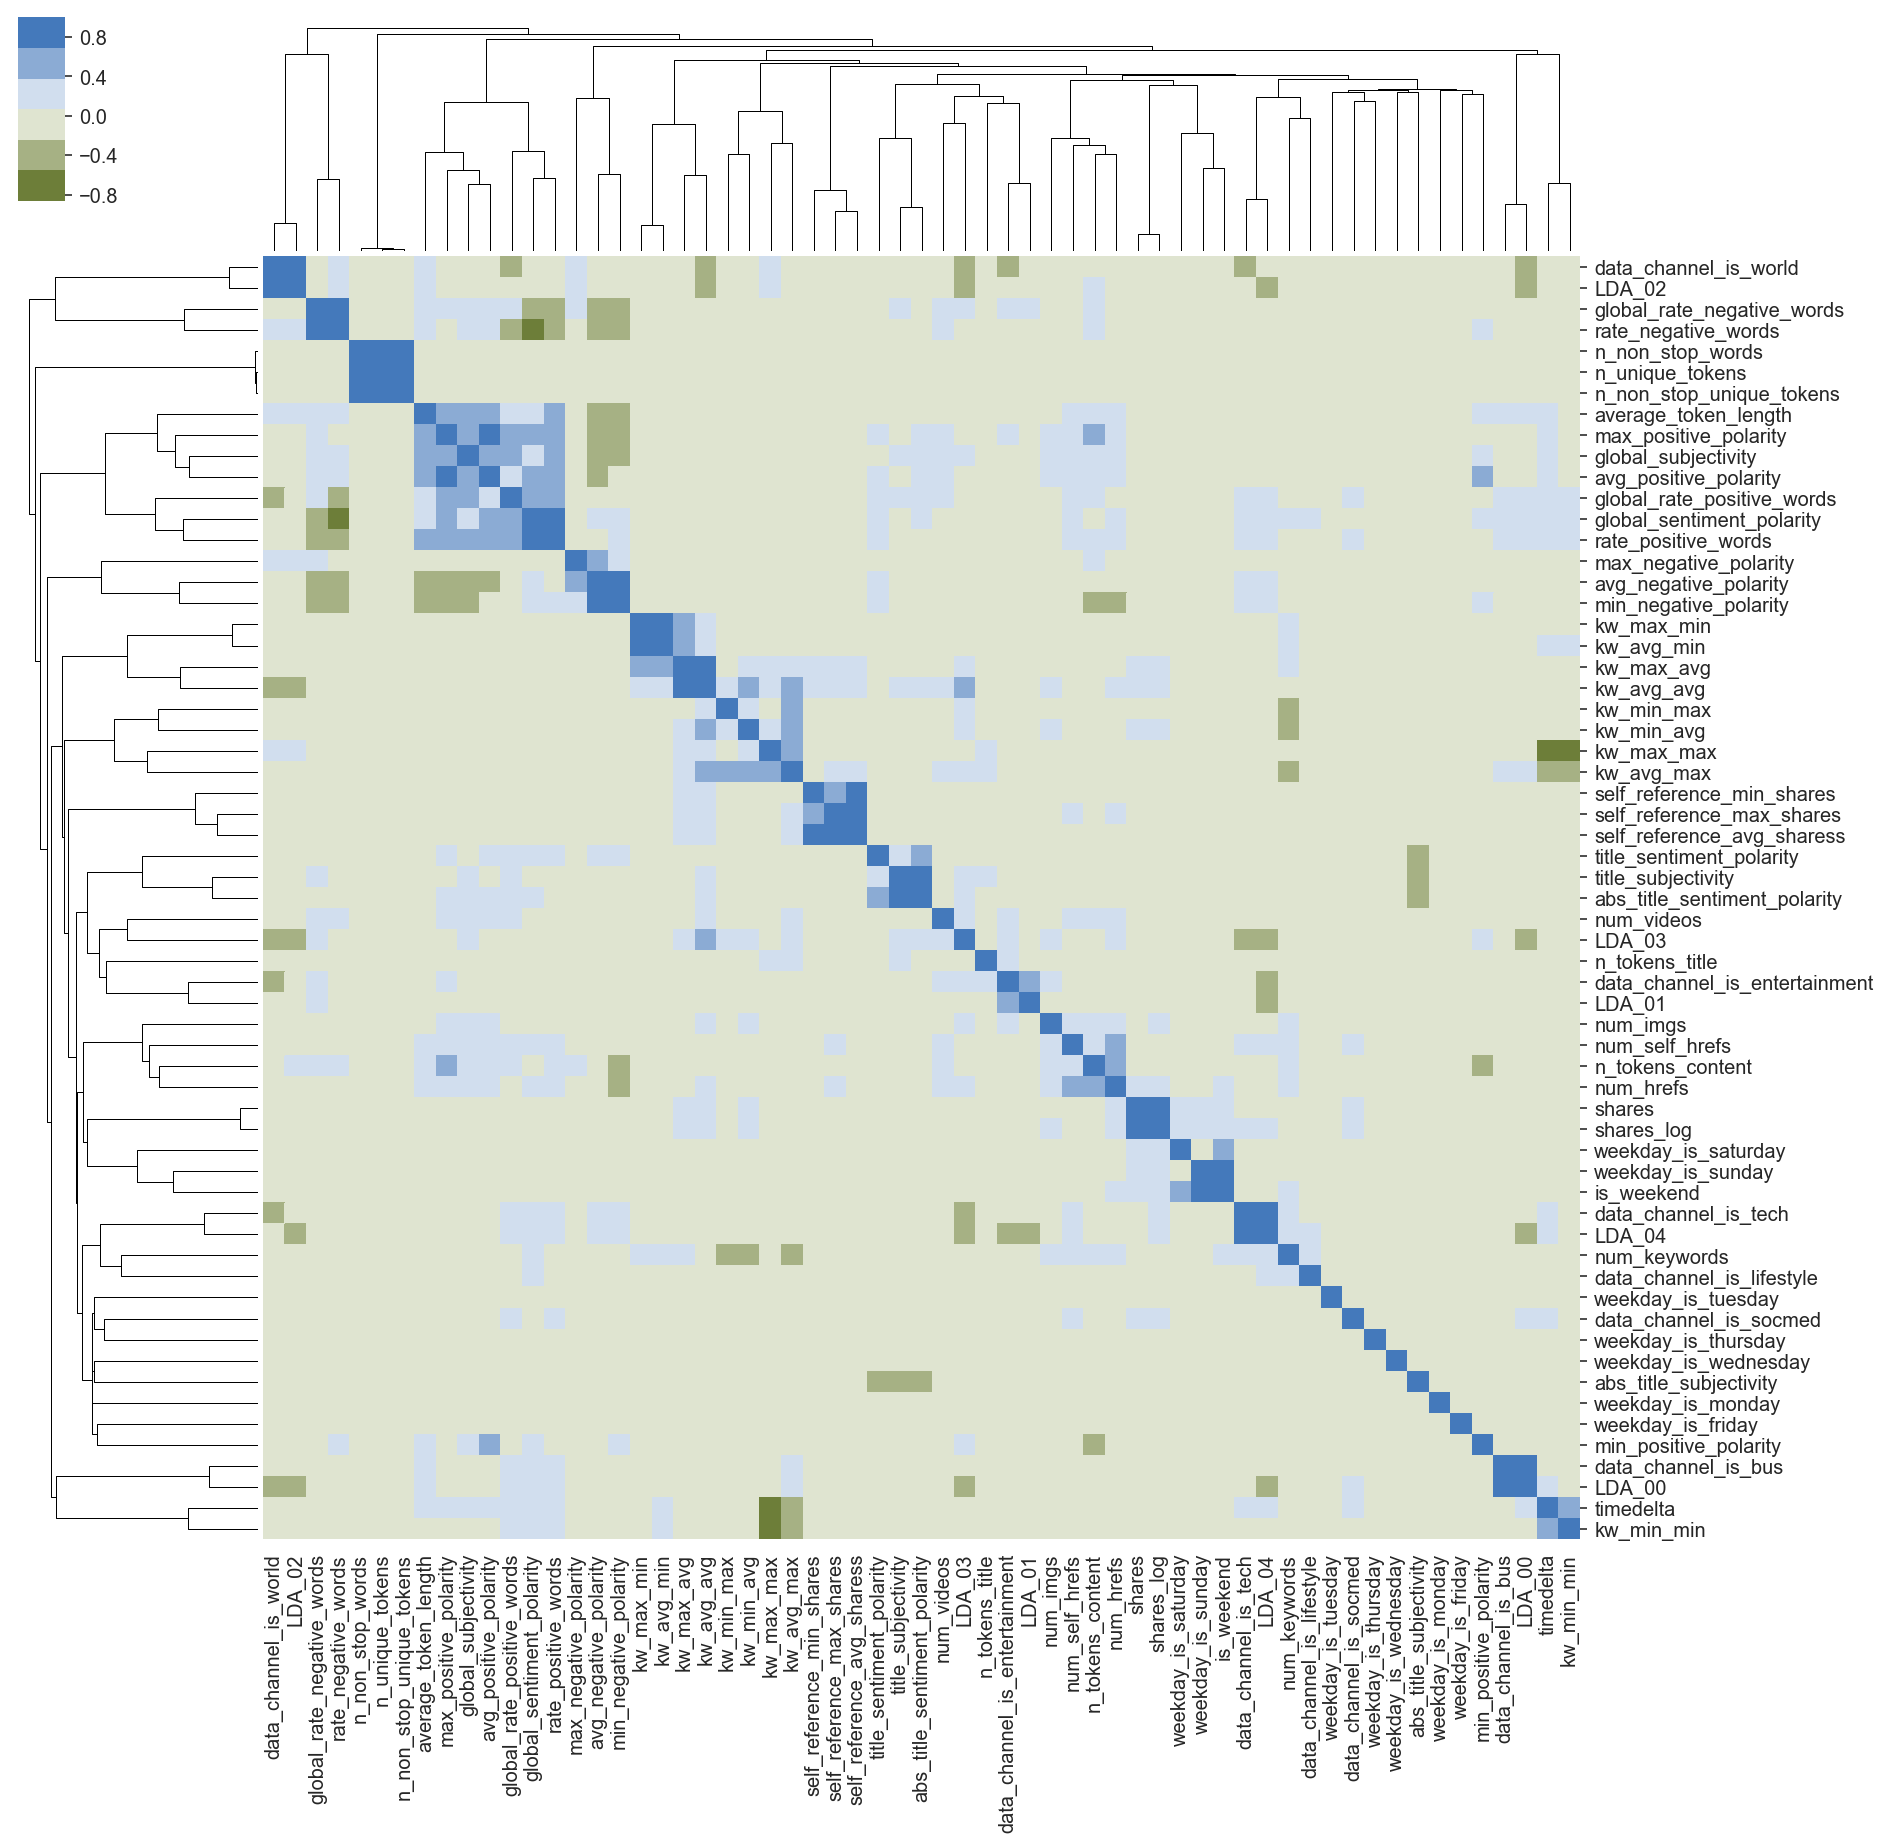

In [562]:
cmap = sns.diverging_palette(h_neg=100, h_pos=250)
sns.clustermap(data_corr, figsize=(14, 14), cmap = cmap)

We can notice that there is some kind of stong relationship between the features like : kw_min_min and kw_max_max / rate_positive_words and and rate_negative_words
From their name we can say that this relationship is negative.

In [563]:
data2.shape

(37429, 63)

# Adding new feature (Date of publication)

In [565]:
data = data[data['shares'] < 10000]
l=[]
for s in data.url:
    match = re.search('\d{4}/\d{2}/\d{2}', s)
    date = datetime.datetime.strptime(match.group(), '%Y/%m/%d').date()
    l.append(date)
data2['date']=l
data2['date'] = pd.to_datetime(data2.date)
data2.head()

url  timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   

   n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  ...  \
0                  0.815385        4.0             2.0       1.0  ...   
1                  0.791946        3.0             1.0       1.0  ...   
2                  0.663866        3.0             1.0       1.0  ...   
3                  0.665635        9.0             0.0       1.0  ...   
4                  0.540890       19.0            19.0      20.0  ...   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   

   abs_title_sentiment_polarity  shares  shares_log       date  
0                      0.187500     593    6.386879 2013-01-07  
1                      0.000000     711    6.568078 2013-01-07  
2                      0.000000    1500    7.313887 2013-01-07  
3                      0.000000    1200    7.090910 2013-01-07  
4                      0.136364     505    6.226537 2013-01-07  

[5 rows x 63 columns]

Maybe the url is not important for the predictions, but the data that has within may be 

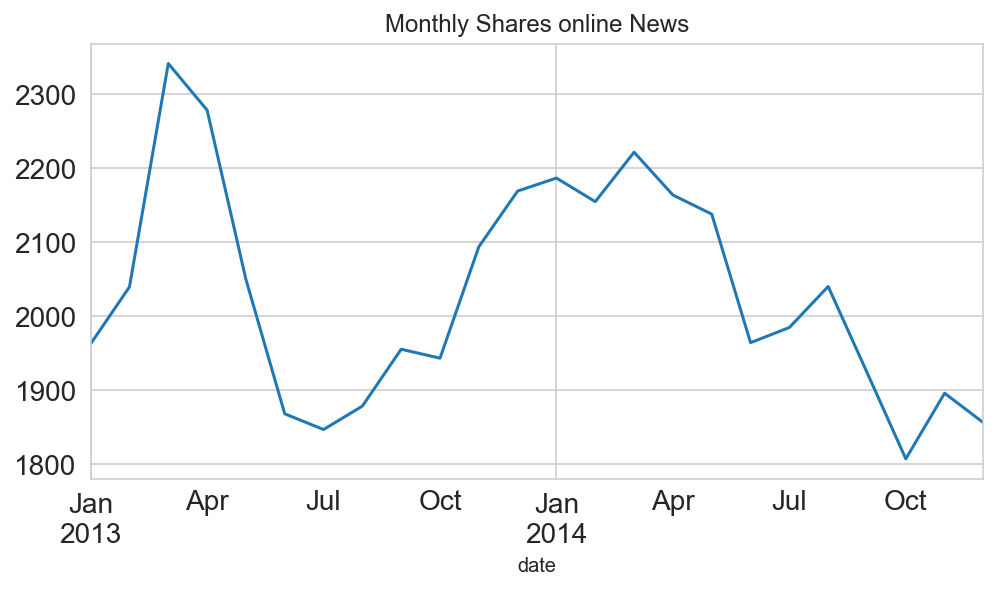

In [566]:
data_month = data2.copy()
data_month.set_index('date', inplace=True)
#data_month = data_month.resample('M').mean()
#data_month.shares.plot(figsize=(8,4), title= 'Monthly Shares online News', fontsize=14)
#plt.show()
monthly_resampled_df = data_month.resample('M').mean()
monthly_resampled_df.shares.plot(figsize=(8,4), title= 'Monthly Shares online News', fontsize=14)
plt.show()

As we can see, the number of shares decreased year by year during this period.

# Features reduction

# Using PCA

In [567]:
#removing the features that cant take place in the pca 
columns = list(data2.columns)
columns.remove('shares')
columns.remove('shares_log')
columns.remove('url')
columns.remove('date')

X_pca = data2[columns]
X_pca.head()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0      731.0            12.0             219.0         0.663594   
1      731.0             9.0             255.0         0.604743   
2      731.0             9.0             211.0         0.575130   
3      731.0             9.0             531.0         0.503788   
4      731.0            13.0            1072.0         0.415646   

   n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0               1.0                  0.815385        4.0             2.0   
1               1.0                  0.791946        3.0             1.0   
2               1.0                  0.663866        3.0             1.0   
3               1.0                  0.665635        9.0             0.0   
4               1.0                  0.540890       19.0            19.0   

   num_imgs  num_videos  ...  avg_positive_polarity  min_positive_polarity  \
0       1.0         0.0  ...               0.378636               0.100000   
1       1.0         0.0  ...               0.286915               0.033333   
2       1.0         0.0  ...               0.495833               0.100000   
3       1.0         0.0  ...               0.385965               0.136364   
4      20.0         0.0  ...               0.411127               0.033333   

   max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                    0.7              -0.350000                 -0.600   
1                    0.7              -0.118750                 -0.125   
2                    1.0              -0.466667                 -0.800   
3                    0.8              -0.369697                 -0.600   
4                    1.0              -0.220192                 -0.500   

   max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0              -0.200000            0.500000                 -0.187500   
1              -0.100000            0.000000                  0.000000   
2              -0.133333            0.000000                  0.000000   
3              -0.166667            0.000000                  0.000000   
4              -0.050000            0.454545                  0.136364   

   abs_title_subjectivity  abs_title_sentiment_polarity  
0                0.000000                      0.187500  
1                0.500000                      0.000000  
2                0.500000                      0.000000  
3                0.500000                      0.000000  
4                0.045455                      0.136364  

[5 rows x 59 columns]

In [568]:
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

Now we can take a look at the variation of each PCA of this data, after calculating them

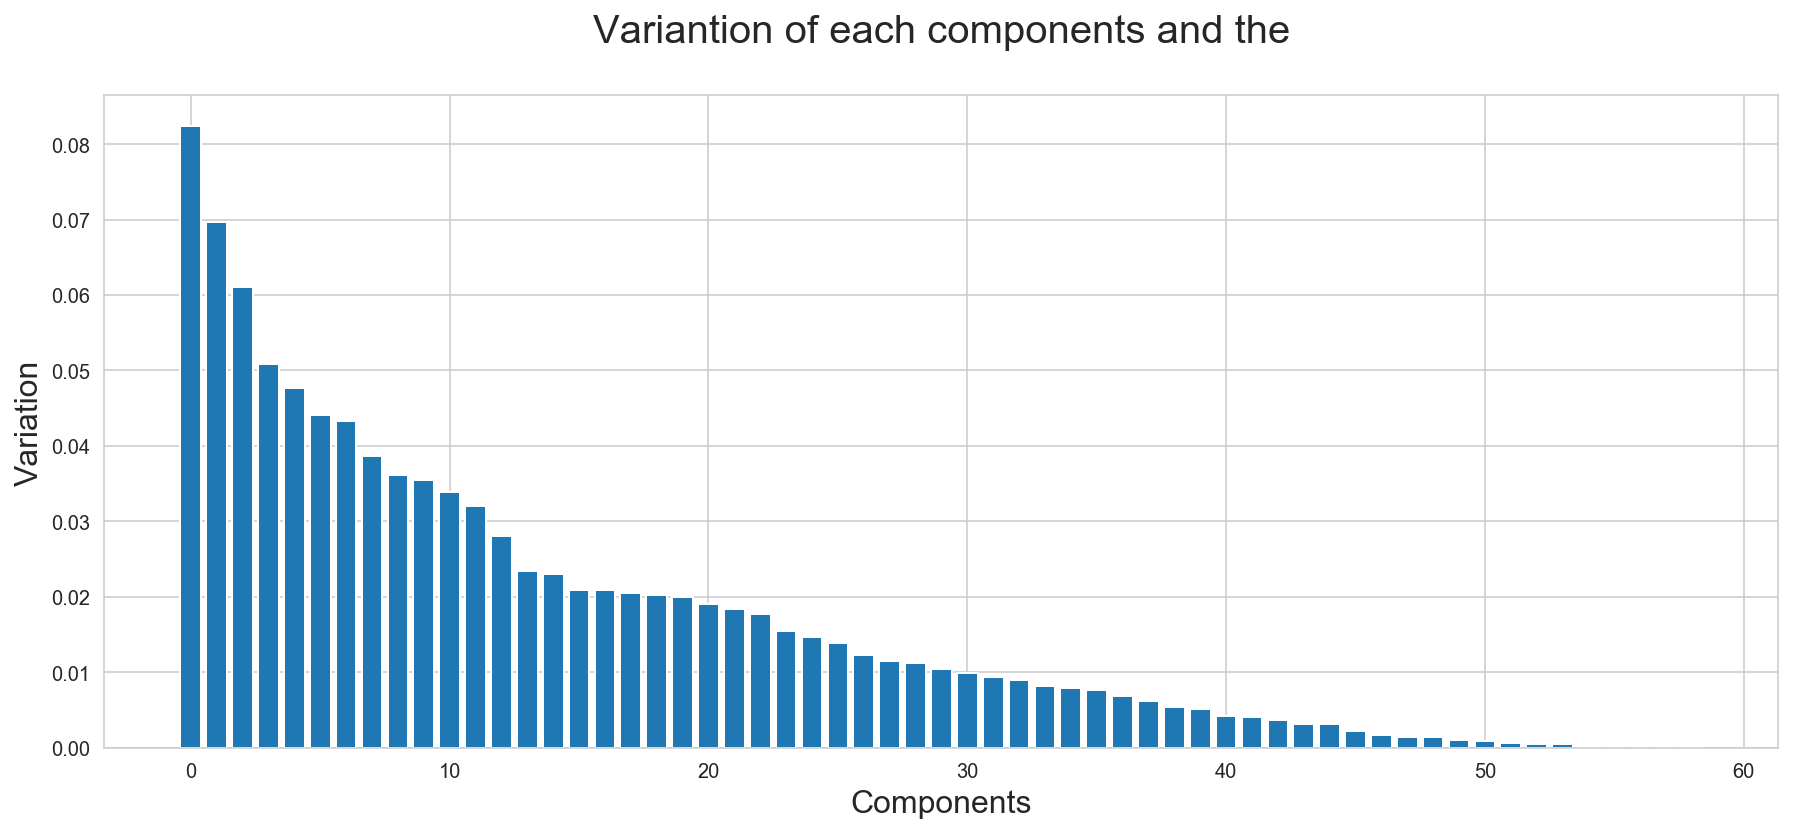

[8.23506404e-02 6.96505145e-02 6.09994322e-02 5.08844069e-02
 4.76285356e-02 4.41422896e-02 4.32275642e-02 3.86583619e-02
 3.61536305e-02 3.54268685e-02 3.38993458e-02 3.19798556e-02
 2.79998279e-02 2.34523138e-02 2.30306855e-02 2.09441605e-02
 2.08366777e-02 2.05566258e-02 2.02373932e-02 1.99105135e-02
 1.90680597e-02 1.83910676e-02 1.76894412e-02 1.54597738e-02
 1.46455330e-02 1.38121941e-02 1.23365791e-02 1.15145921e-02
 1.11576090e-02 1.03684173e-02 9.85159667e-03 9.40356312e-03
 9.00003349e-03 8.12218034e-03 7.89996472e-03 7.59553336e-03
 6.87626146e-03 6.16412428e-03 5.33383441e-03 5.15239747e-03
 4.13755835e-03 4.05600610e-03 3.66671104e-03 3.18221438e-03
 3.08831550e-03 2.17904964e-03 1.65894471e-03 1.39724634e-03
 1.34670419e-03 1.00573232e-03 8.68044005e-04 6.59158217e-04
 5.00481576e-04 4.36711223e-04 3.99165706e-06 7.30736071e-07
 4.31324212e-12 1.62408002e-32 3.59876049e-33]


In [569]:
#Calculate the PCAs
pca = PCA()
pca.fit(X_pca_scaled)
variation = pca.explained_variance_ratio_

ax = plt.gca()
ax.set_ylabel('Variation', fontsize=16)
ax.set_xlabel('Components', fontsize=16)
ax.set_title('Variantion of each components and the\n', fontsize=20)

plt.bar(range(len(variation)), variation)
plt.show()
print(variation)

Now after fiting the PCA with our features, we can transform the features by these components (new data) 

In [570]:
X_to_PCA = pca.fit_transform(X_pca_scaled)

The reason of the PCA is to reduce the number of features (the dimentionality reduction). So now we need to know how much components do we need to get rid of.

I've found an algorithm called Horn's Parallel Analysis which could do the work. 

#  Horn's Parallel Analysis

By this procedure, we can know which components arent noise

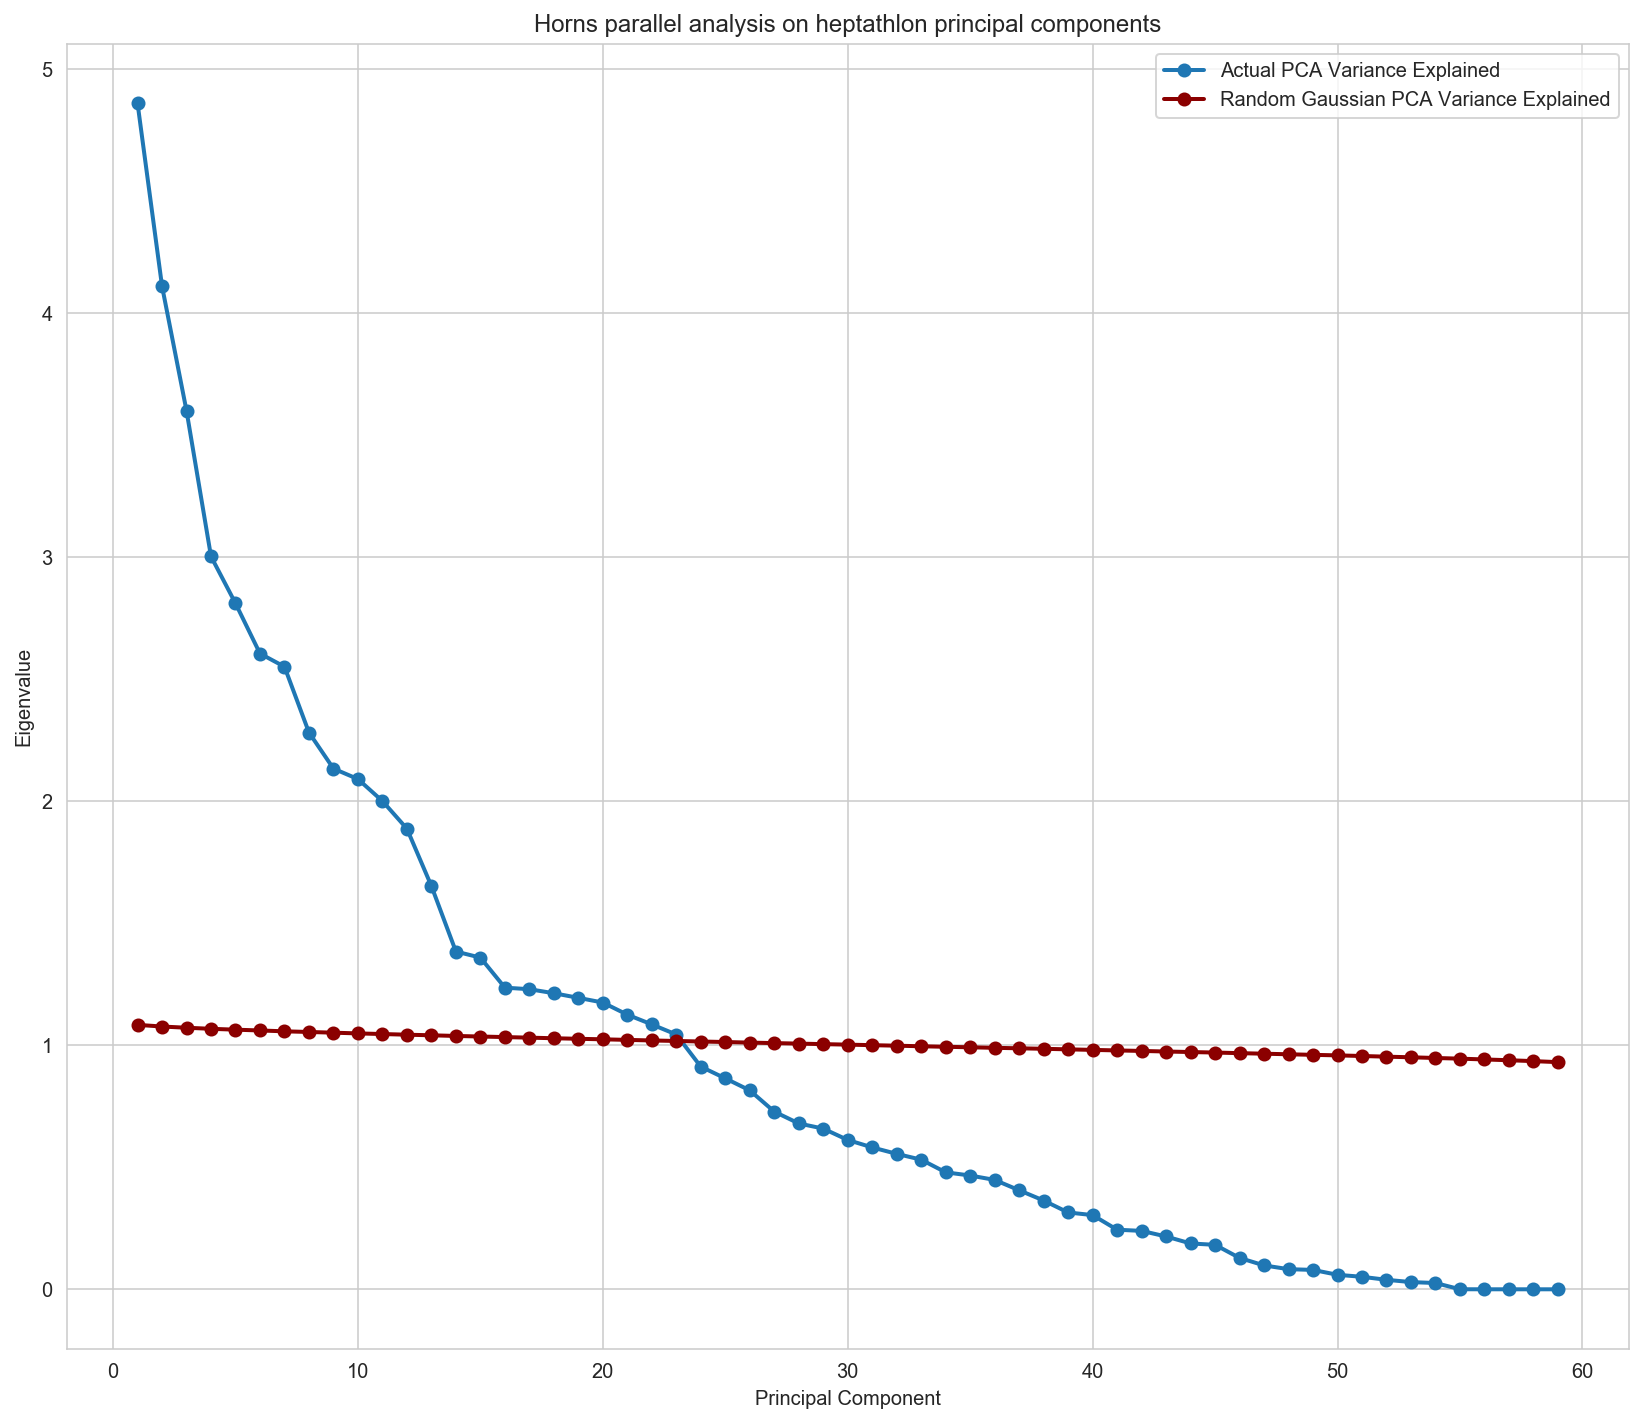

In [571]:
def horn_parallel_analysis(shape, iters=1000, percentile=95):
    pca = PCA(n_components=shape[1])
    eigenvals = []
    
    for i in range(iters):
        rdata = np.random.normal(0,1,size=shape)
        pca.fit(rdata)
        eigenvals.append(pca.explained_variance_)
    
    eigenvals = np.array(eigenvals)
    return np.percentile(eigenvals, percentile, axis=0)

hep_pa = horn_parallel_analysis(X_to_PCA.shape, percentile=95)

fig, ax = plt.subplots(figsize=(14,12))

ax.plot(range(1, X_to_PCA.shape[1]+1), pca.explained_variance_, lw=2, marker='o')
ax.plot(range(1, X_to_PCA.shape[1]+1), hep_pa, lw=2, color='darkred', marker='o')
ax.set_title("Horns parallel analysis on heptathlon principal components")
ax.set_xlabel("Principal Component")
ax.set_ylabel("Eigenvalue")

plt.legend(['Actual PCA Variance Explained', "Random Gaussian PCA Variance Explained"])
plt.show()

We will take the components that have EIgenvalues above the plot of the random gaussian PCA
The number of components : 23

In [572]:
pca = PCA(n_components=23)
pca.fit(X_pca_scaled)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [573]:
len(pca.components_)

23

In [574]:
Dict = {}
for i in range(len(pca.components_)):
    Dict['PC'+str(i)]= pca.components_[i]
    
df_components = pd.DataFrame(Dict,index=X_pca.columns)
df_components.head()

PC0       PC1       PC2       PC3       PC4       PC5  \
timedelta        -0.165049 -0.189161 -0.091508 -0.011356  0.238372 -0.168075   
n_tokens_title    0.057435  0.076160  0.018526 -0.001490 -0.056311 -0.027357   
n_tokens_content -0.129006  0.119172 -0.134751  0.000283 -0.063947  0.152615   
n_unique_tokens  -0.004619  0.000730 -0.006929  0.576308  0.025843 -0.004701   
n_non_stop_words -0.007416  0.002818 -0.010693  0.576205  0.024002  0.000363   

                       PC6       PC7       PC8       PC9  ...      PC13  \
timedelta         0.131012 -0.057011  0.088483 -0.111339  ... -0.013636   
n_tokens_title   -0.096721 -0.034760 -0.013146  0.104895  ... -0.034386   
n_tokens_content -0.185212  0.146181  0.171560 -0.156642  ... -0.045034   
n_unique_tokens  -0.004220  0.001487  0.003499  0.006860  ...  0.002489   
n_non_stop_words -0.008639  0.005302  0.007628  0.003815  ...  0.001738   

                      PC14      PC15      PC16      PC17      PC18      PC19  \
timedelta         0.042399 -0.006136  0.000481  0.024215 -0.029382 -0.001169   
n_tokens_title    0.026944  0.067172  0.062622 -0.001031  0.019608  0.069753   
n_tokens_content  0.055574  0.022230 -0.018876 -0.006660 -0.005109 -0.030671   
n_unique_tokens  -0.002715  0.005727 -0.003630 -0.004526  0.009547  0.002166   
n_non_stop_words -0.001301  0.005993 -0.004345 -0.004169  0.008703  0.001126   

                      PC20      PC21      PC22  
timedelta         0.020487 -0.008011 -0.011190  
n_tokens_title    0.220611 -0.299881 -0.157486  
n_tokens_content -0.061288 -0.106696 -0.070276  
n_unique_tokens   0.003026  0.001048  0.001498  
n_non_stop_words  0.000519 -0.001358 -0.000728  

[5 rows x 23 columns]

In [575]:
for column in df_components.columns:
    print (column, df_components[column].argmax(), df_components[column].max())

PC0 data_channel_is_world 0.1649041558012102
PC1 rate_negative_words 0.2921278220602104
PC2 kw_avg_avg 0.34959997897059675
PC3 n_unique_tokens 0.5763079315820577
PC4 kw_avg_min 0.3962055640104336
PC5 self_reference_avg_sharess 0.29103245492863206
PC6 LDA_00 0.3096696475711074
PC7 kw_max_min 0.31940078742001515
PC8 LDA_00 0.30167767433983167
PC9 abs_title_sentiment_polarity 0.33824953342314285
PC10 is_weekend 0.5172096748134342
PC11 data_channel_is_entertainment 0.33744806953209927
PC12 LDA_01 0.37700264929879224
PC13 num_keywords 0.20362679307173503
PC14 kw_min_max 0.36938412118428415
PC15 weekday_is_wednesday 0.7838843608128984
PC16 weekday_is_tuesday 0.7529159306608862
PC17 weekday_is_monday 0.5947964228028388
PC18 weekday_is_monday 0.5081510948119495
PC19 weekday_is_monday 0.35515857033292453
PC20 num_videos 0.3583876495097931
PC21 data_channel_is_socmed 0.5517930481658666
PC22 data_channel_is_socmed 0.5255829785581977


C:\Users\Yassine\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


We can say that these compoenets is dominated by the features beside

In [576]:
#Fiting the pca with just 23 components 
X_to_PCA = pca.fit_transform(X_pca_scaled)

In [577]:
#the shape of the new data
X_to_PCA.shape

(37429, 23)

In [578]:
#Saving the new data with 23 components
pd.DataFrame(X_to_PCA).to_csv('./X_to_PCA.csv',encoding='utf-8',index_label= False)

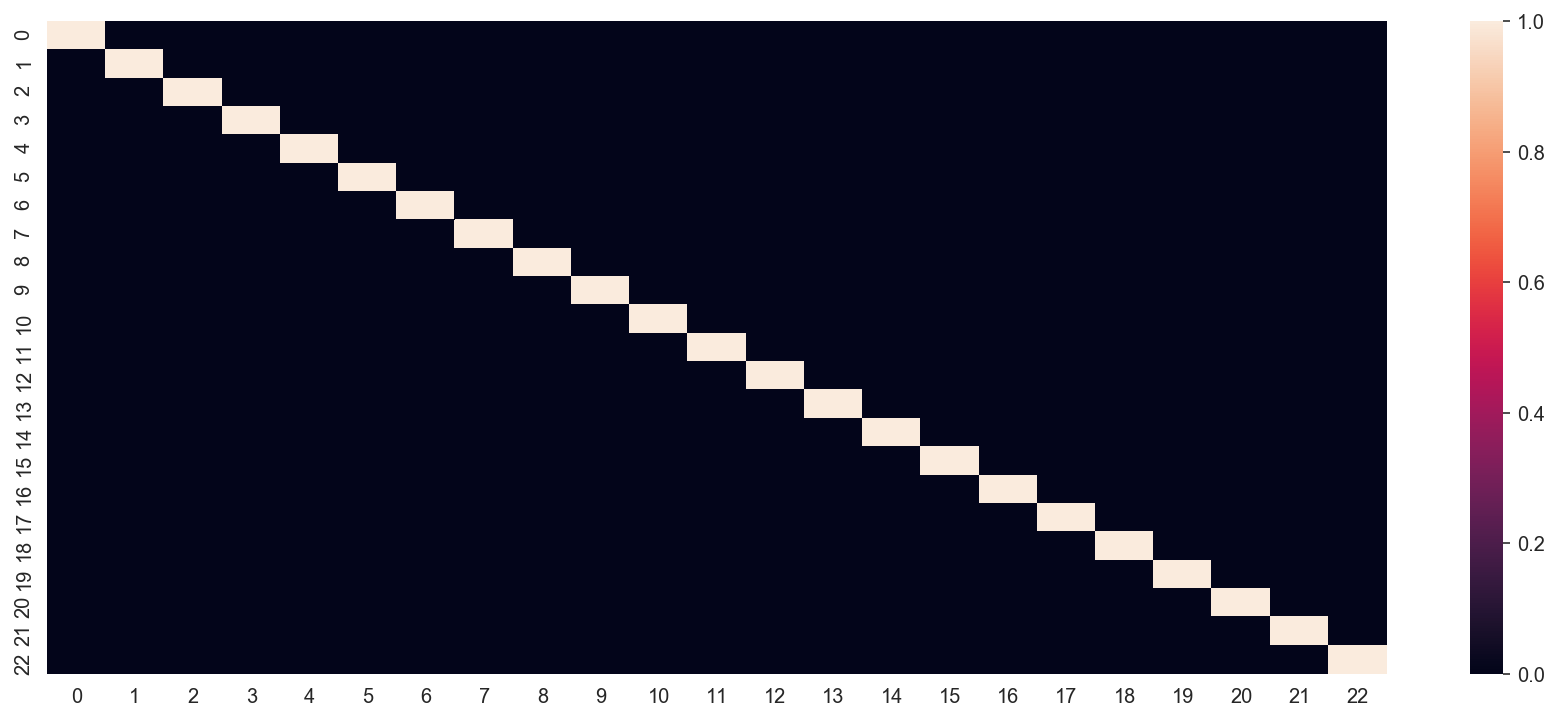

In [579]:
#Ploting the correlations between the componentes
sns.heatmap(np.corrcoef(X_to_PCA.T))
plt.show()

Now we can note that the columns are not correlated with each other

# Using Random Forrest

In [580]:
all_columns=list(data2.columns)

In [581]:
#nous allons ignorer la variable timedelta parce que ce n'est pas une variable pertinente
features = data2[all_columns[1:60]]
target = data2[['shares']]

In [582]:
#Testing the importance of each features to the target with Randomforrestclassifier and plotting it
rfc = RandomForestClassifier()
rfc.fit(features,target)
importances = rfc.feature_importances_

C:\Users\Yassine\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Yassine\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [583]:
d = {'features':features.columns, 'importance': importances}
df_importance = pd.DataFrame(d)
df_importance.set_index('features', inplace=True)
df_importance=df_importance.sort_values(by=['importance'], ascending=[False])
df_importance

importance
features                                 
kw_avg_avg                       0.028761
average_token_length             0.028606
kw_max_avg                       0.028455
LDA_04                           0.028171
timedelta                        0.027984
avg_positive_polarity            0.027885
kw_avg_min                       0.027859
kw_avg_max                       0.027856
LDA_01                           0.027795
global_subjectivity              0.027577
LDA_00                           0.027385
LDA_02                           0.027370
LDA_03                           0.027242
kw_max_min                       0.027083
n_non_stop_unique_tokens         0.026854
global_rate_positive_words       0.026445
n_unique_tokens                  0.025994
n_tokens_content                 0.025962
global_sentiment_polarity        0.025803
avg_negative_polarity            0.025780
global_rate_negative_words       0.025361
rate_positive_words              0.022700
rate_negative_words              0.022214
num_hrefs                        0.022165
self_reference_avg_sharess       0.021609
self_reference_min_shares        0.021343
self_reference_max_shares        0.021195
n_tokens_title                   0.020803
kw_min_avg                       0.019361
kw_min_max                       0.018084
min_negative_polarity            0.018073
max_negative_polarity            0.017068
title_sentiment_polarity         0.016859
num_self_hrefs                   0.016769
num_imgs                         0.014827
title_subjectivity               0.014514
abs_title_sentiment_polarity     0.014324
min_positive_polarity            0.014278
max_positive_polarity            0.013818
abs_title_subjectivity           0.013785
num_keywords                     0.013761
num_videos                       0.010979
kw_max_max                       0.005657
kw_min_min                       0.005599
weekday_is_tuesday               0.005434
weekday_is_monday                0.005127
weekday_is_thursday              0.005068
weekday_is_wednesday             0.005035
weekday_is_friday                0.004784
data_channel_is_bus              0.002896
data_channel_is_tech             0.002830
is_weekend                       0.002805
data_channel_is_world            0.002804
data_channel_is_entertainment    0.002551
weekday_is_sunday                0.002317
data_channel_is_lifestyle        0.002081
data_channel_is_socmed           0.002055
weekday_is_saturday              0.002038
n_non_stop_words                 0.000159

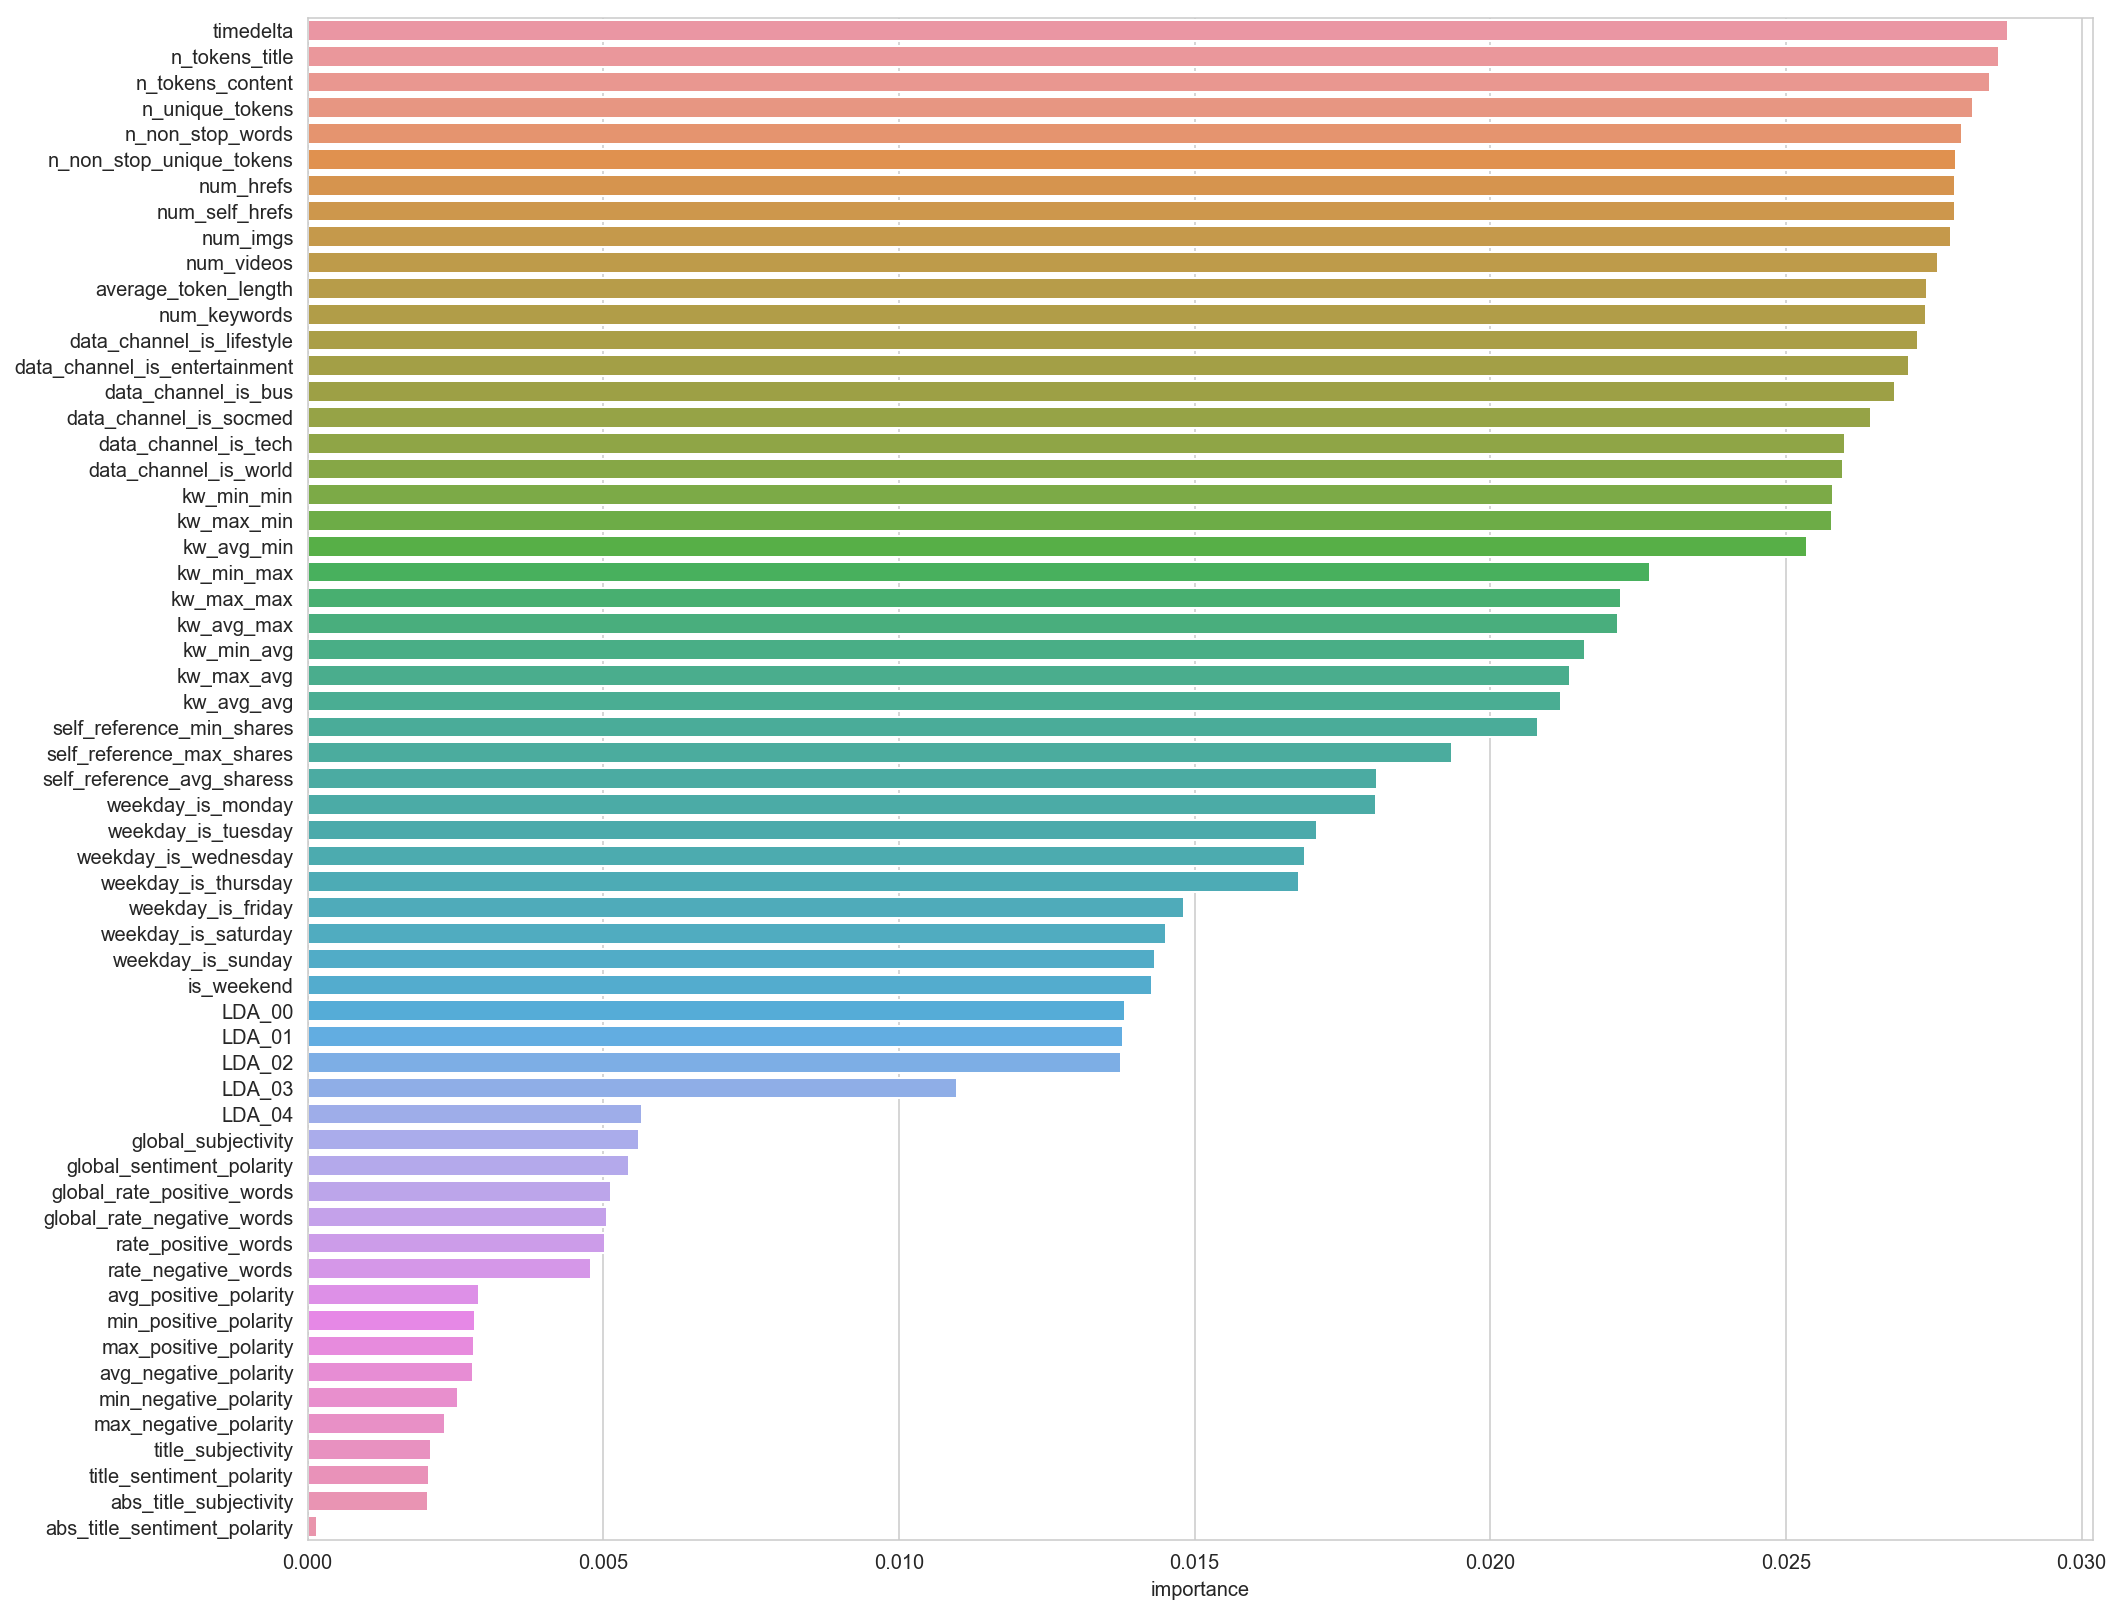

In [584]:
f, ax = plt.subplots(figsize=(16, 14))
ax = sns.barplot(x='importance',y=features.columns, data=df_importance)

After calculating the importances by the random forrest technique, we need to make a decision about selecting the features that affect the target the most.  

We will make an hypothesis and chose the features thar have relative importance greater that 0.02, and we will compare the scores between the madol (taking in consideration this hypethesis) and the model (working with all features)

In [585]:
important_features = list(df_importance[df_importance['importance']>0.02].index)
print(important_features)

['kw_avg_avg', 'average_token_length', 'kw_max_avg', 'LDA_04', 'timedelta', 'avg_positive_polarity', 'kw_avg_min', 'kw_avg_max', 'LDA_01', 'global_subjectivity', 'LDA_00', 'LDA_02', 'LDA_03', 'kw_max_min', 'n_non_stop_unique_tokens', 'global_rate_positive_words', 'n_unique_tokens', 'n_tokens_content', 'global_sentiment_polarity', 'avg_negative_polarity', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'num_hrefs', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'n_tokens_title']


# Spliting data into train/test sets

In [586]:
X_pca=X_to_PCA
X_import=data2[important_features]
y=data2['shares']

In [587]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.33, random_state=42)

# Prediction phase with PCA using 3 models : 

# Linear Regression model

In [588]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#fit the data to the model
linreg_pca = LinearRegression()
linreg_pca.fit(X_train_pca,y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

We test how the model perform in the train_set

In [589]:
df_samples_linreg_train_pca = pd.DataFrame(data={"Predicted shares":linreg_pca.predict(X_train_pca),"Actual shares":list(y_train_pca)})
df_samples_linreg_train_pca.head()

Predicted shares  Actual shares
0       1440.175169           1200
1       2244.116510           1600
2       1904.837708            660
3       2577.276518           1200
4       1830.265454            913

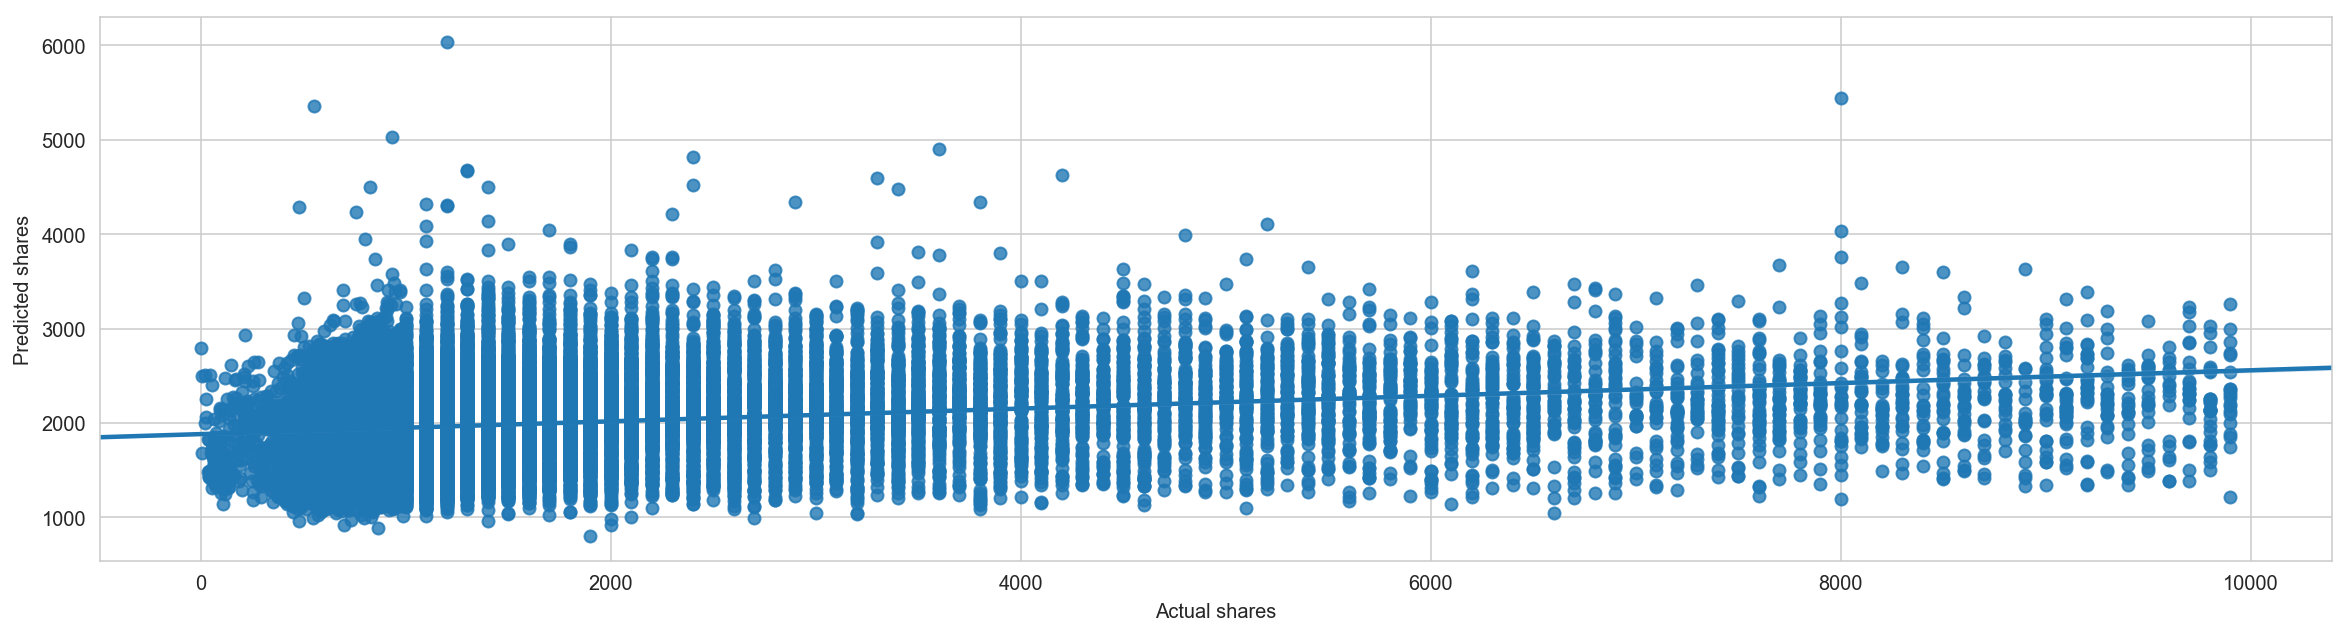

In [591]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_linreg_train_pca["Actual shares"], y=df_samples_linreg_train_pca["Predicted shares"])

The linear regression model fit the training data in a good way 

In [592]:
from sklearn.metrics import r2_score
#RMSE for this model in the train set
share_predictions_linreg = linreg_pca.predict(X_train_pca)
linreg_mse_pca = mean_squared_error(y_train_pca, share_predictions_linreg)
linreg_rmse_pca = np.sqrt(linreg_mse_pca)
print("the rmse of the linear regress model applied in the train set : ",linreg_rmse_pca)

the rmse of the linear regress model applied in the train set :  1693.1593727536479


In [593]:
#MAE
linreg_mae_pca = mean_absolute_error(y_train_pca, share_predictions_linreg)
print("the mae of the linear regress model applied in the train set : ",linreg_mae_pca)

the mae of the linear regress model applied in the train set :  1177.4739043205013


We note this RMSE and MAE using train/test splitting

Now we test how the model perform in the test_set to see if it overfit or underfit the data

In [594]:
df_samples_linreg_test_pca = pd.DataFrame(data={"Predicted shares":linreg_pca.predict(X_test_pca),"Actual shares":list(y_test_pca)})
df_samples_linreg_test_pca.head()

Predicted shares  Actual shares
0       1353.765029           1600
1       1720.820333           1400
2       1811.691248           1900
3       2364.573518           3400
4       1307.214366            736

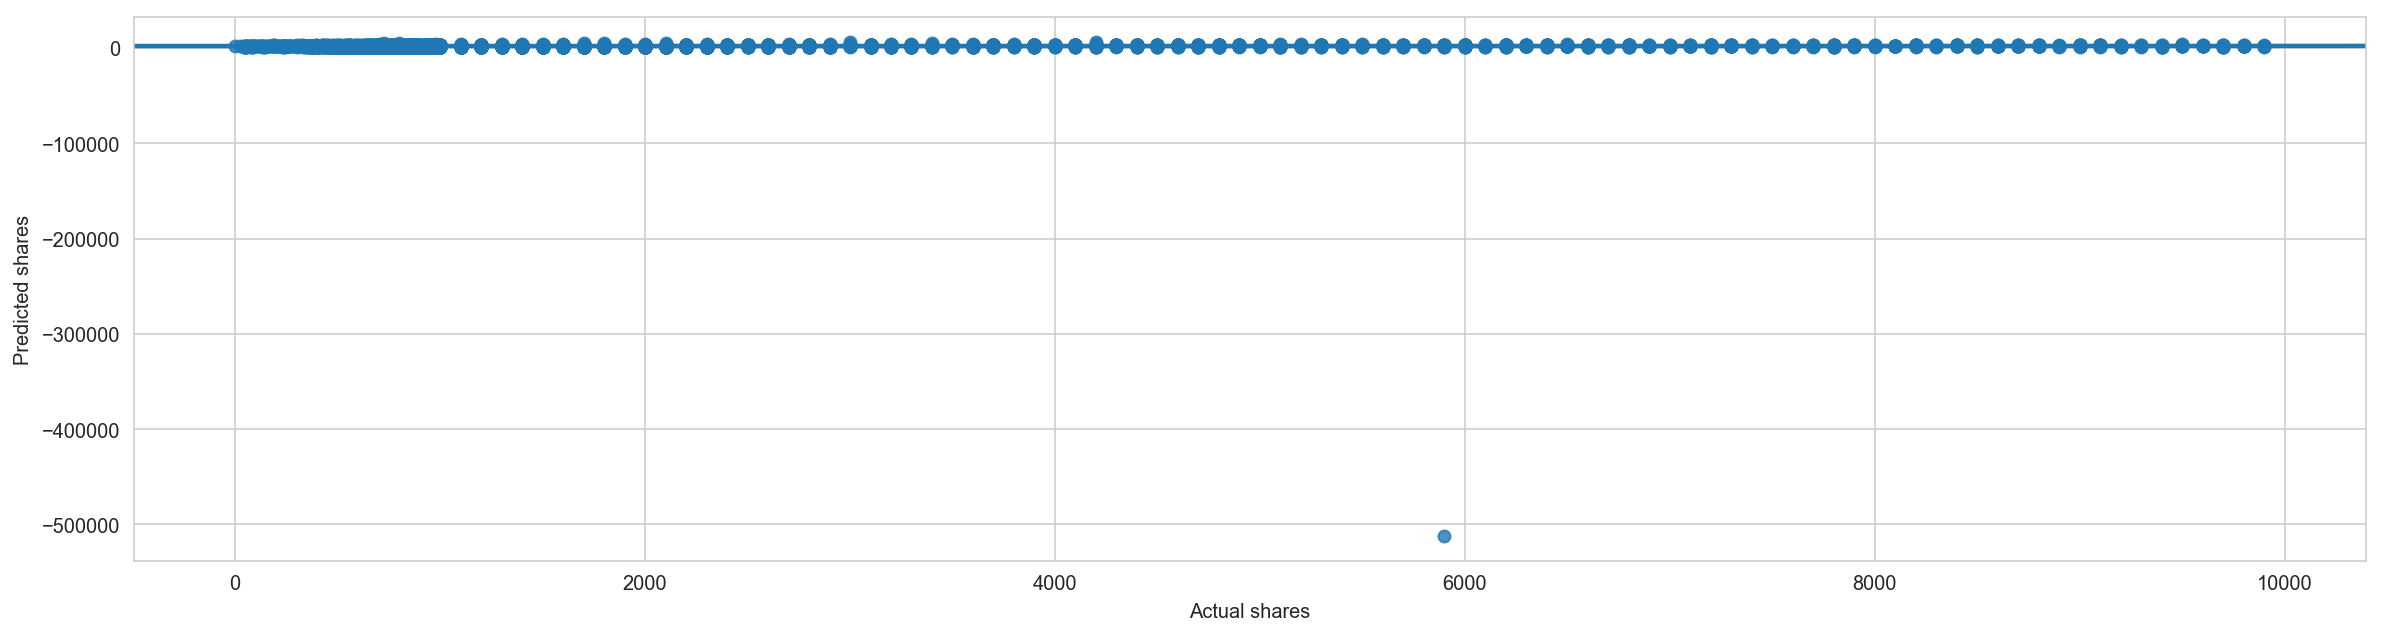

In [595]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_linreg_test_pca["Actual shares"], y=df_samples_linreg_test_pca["Predicted shares"])

In [596]:
#the RMSE and  for the samples from the test_set
share_predictions = linreg_pca.predict(X_test_pca)
linreg_mse_pca = mean_squared_error(y_test_pca, share_predictions)
linreg_rmse_test_pca = np.sqrt(linreg_mse_pca)
print("the RMSE of the linear regress model applied in the test set : ",linreg_rmse_test_pca)

the RMSE of the linear regress model applied in the test set :  4965.090821680487


In [597]:
#MAE
linreg_mae_test_pca = mean_absolute_error(y_train_pca, share_predictions_linreg)
print("the mae of the linear regress model applied in the test set : ",linreg_mae_test_pca)

the mae of the linear regress model applied in the test set :  1177.4739043205013


By this high value of RMSE, it looks like the model is overfitting the data. 
There is a way to surpace this probleme by using the cross validation methode (for other models we will use just this model to calculate the rmse and mar)

Lets see the RMSE using cross validation 

In [598]:
from sklearn.metrics import accuracy_score

scores_linreg_pca = cross_val_score(linreg_pca, X_pca, y, cv=30, scoring='neg_mean_squared_error')
print(np.sqrt(-scores_linreg_pca))
#RMSE : 
print("the rmse of the linear regress model using cross validation method : ",rmse_scores_linreg_pca.mean())

[ 1656.92737848  1660.80040152  1699.18665977  1744.99850449
  1745.28779403  1762.03876748  1699.5923316   1763.69371985
  1695.40941711  1753.2344633   1769.24291591  1653.89661515
  1805.8197585   1958.56543891  1842.10406413  1869.69675321
  1746.90785354  1752.43990621  1707.00399041  1674.13172198
  1498.92426932  1583.29692621  1661.92291706 14198.79663254
  1640.91778303  1627.58031705  1500.61604715  1529.01906
  1584.12190064  1670.41211665]
the rmse of the linear regress model using cross validation method :  2115.5058878420678


The RMSE of the train/test splitting is better than using cross validation because the splitting give us better results

# Random Forrest model 

In [599]:
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)

C:\Users\Yassine\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [600]:
#We test how the model perform in the train_set. 
df_samples_rf_train_pca = pd.DataFrame(data={"Predicted shares":rf_pca.predict(X_train_pca),"Actual shares":list(y_train_pca)})
df_samples_rf_train_pca.head()

Predicted shares  Actual shares
0            1099.6           1200
1            1447.4           1600
2             804.0            660
3            1310.0           1200
4            1050.5            913

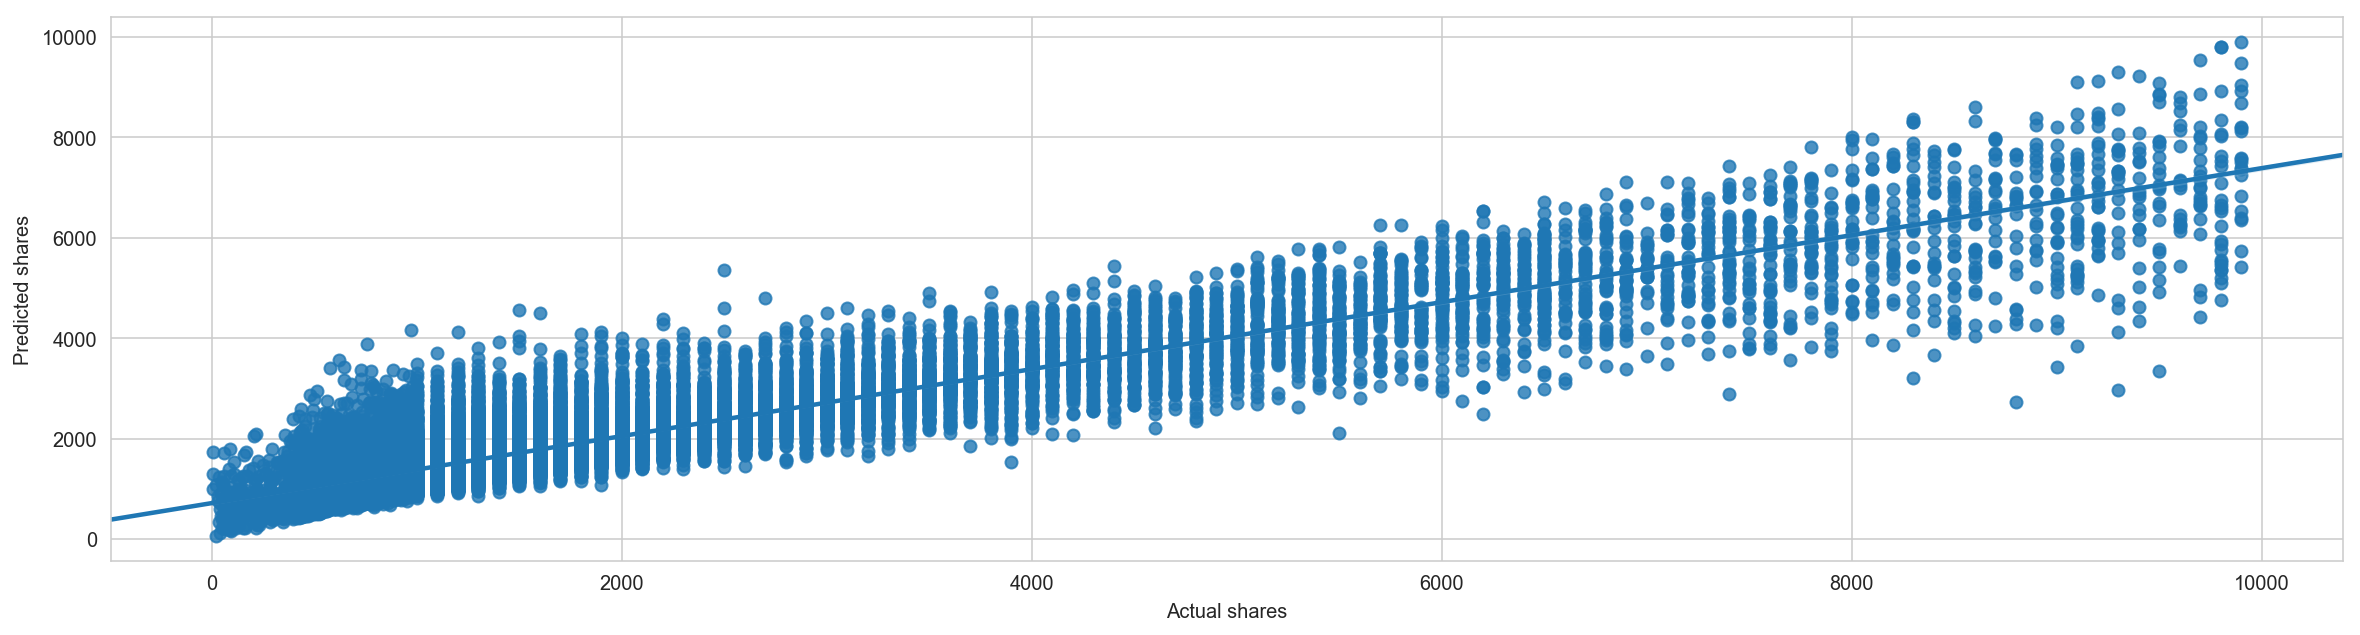

In [601]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_rf_train_pca["Actual shares"], y=df_samples_rf_train_pca["Predicted shares"])

In [602]:
#RMSE of the random forrest model using cross validation 
scores_rf_pca = cross_val_score(rf_pca, X_train_pca, y_train_pca,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_rf_pca = np.sqrt(-scores_rf_pca)
print(rmse_scores_rf_pca)

[1746.210924   1794.89201196 1769.76107078 1882.9857182  1852.54490519
 1790.12903031 1773.87035032 1712.79121001 1860.08954065 1739.49902803]


In [603]:
print(rmse_scores_rf_pca.mean())

1792.277378944891


In [604]:
#RMSE and MAE for Random forrest model using train set

share_predictions_rf_train_pca = rf_pca.predict(X_train_pca)
rf_mse_train_pca = mean_squared_error(y_train_pca, share_predictions_rf_train_pca)
rf_rmse_train_pca = np.sqrt(rf_mse_train_pca)
print(rf_rmse_train_pca)

rf_mae_train_pca = mean_absolute_error(y_train_pca, share_predictions_rf_train_pca)
print(rf_mae_train_pca)

760.8932990419988
496.68991506161024


In [605]:
#RMSE and MAE for Random forrest model using test set

share_predictions_rf_test_pca = rf_pca.predict(X_test_pca)
rf_mse_test_pca = mean_squared_error(y_test_pca, share_predictions_rf_test_pca)
rf_rmse_test_pca = np.sqrt(rf_mse_test_pca)
print(rf_rmse_test_pca)

rf_mae_test_pca = mean_absolute_error(y_test_pca, share_predictions_rf_test_pca)
print(rf_mae_test_pca)

1801.2026724142424
1267.5552542098446


It looks like this model has also overfitted the data, but not that much. The rmse of this model using the train set as samples is much better than linear regression's.

We can affirme this by ploting the test samples by seaborn

In [609]:
#We test how the model perform in the train_set. 
df_samples_rf_test_pca = pd.DataFrame(data={"Predicted shares":rf_pca.predict(X_test_pca),"Actual shares":list(y_test_pca)})
df_samples_rf_test_pca.head()

Predicted shares  Actual shares
0            1496.8           1600
1            1788.7           1400
2            2798.0           1900
3            2456.1           3400
4            1890.3            736

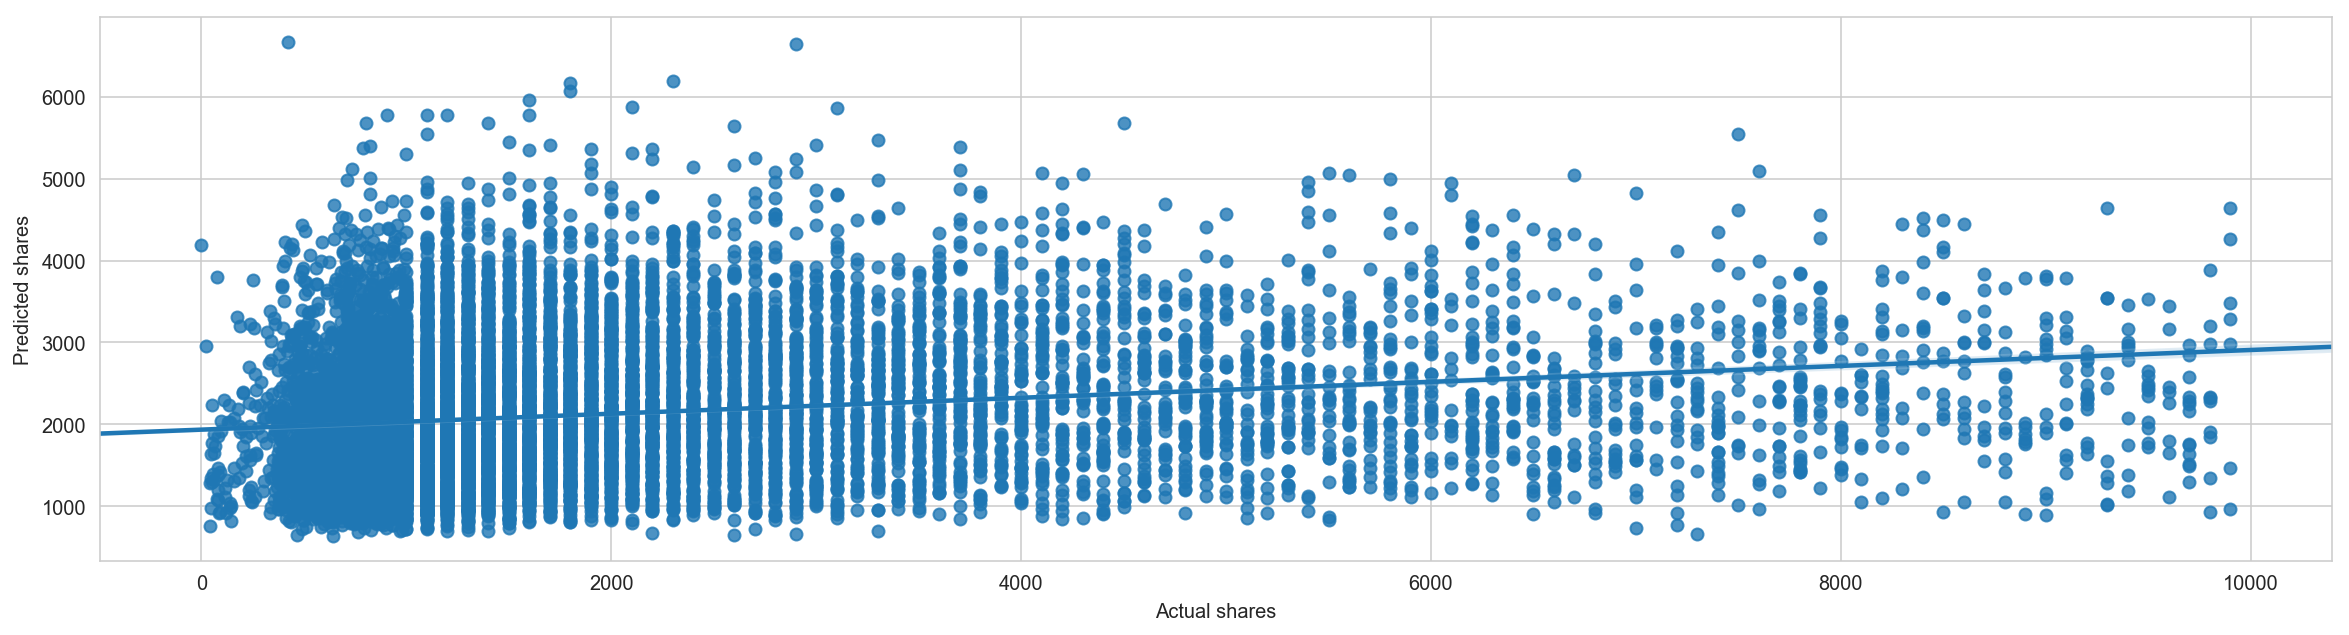

In [607]:
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_rf_test_pca["Actual shares"], y=df_samples_rf_test_pca["Predicted shares"])

See, it doesnt fit as it did with the train set 

# XGBoost Model

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [610]:
xgb_model_pca = xgb.XGBRegressor()
xgb_model_pca.fit(X_train_pca, y_train_pca)

C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:18:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [615]:
#We test how the model perform in the train_set. 
df_samples_xgb_train_pca = pd.DataFrame(data={"Predicted shares":xgb_model_pca.predict(X_train_pca),"Actual shares":list(y_train_pca)})
df_samples_xgb_train_pca.head()

Predicted shares  Actual shares
0       1500.221558           1200
1       2051.913574           1600
2       1968.698486            660
3       2225.795166           1200
4       1606.942261            913

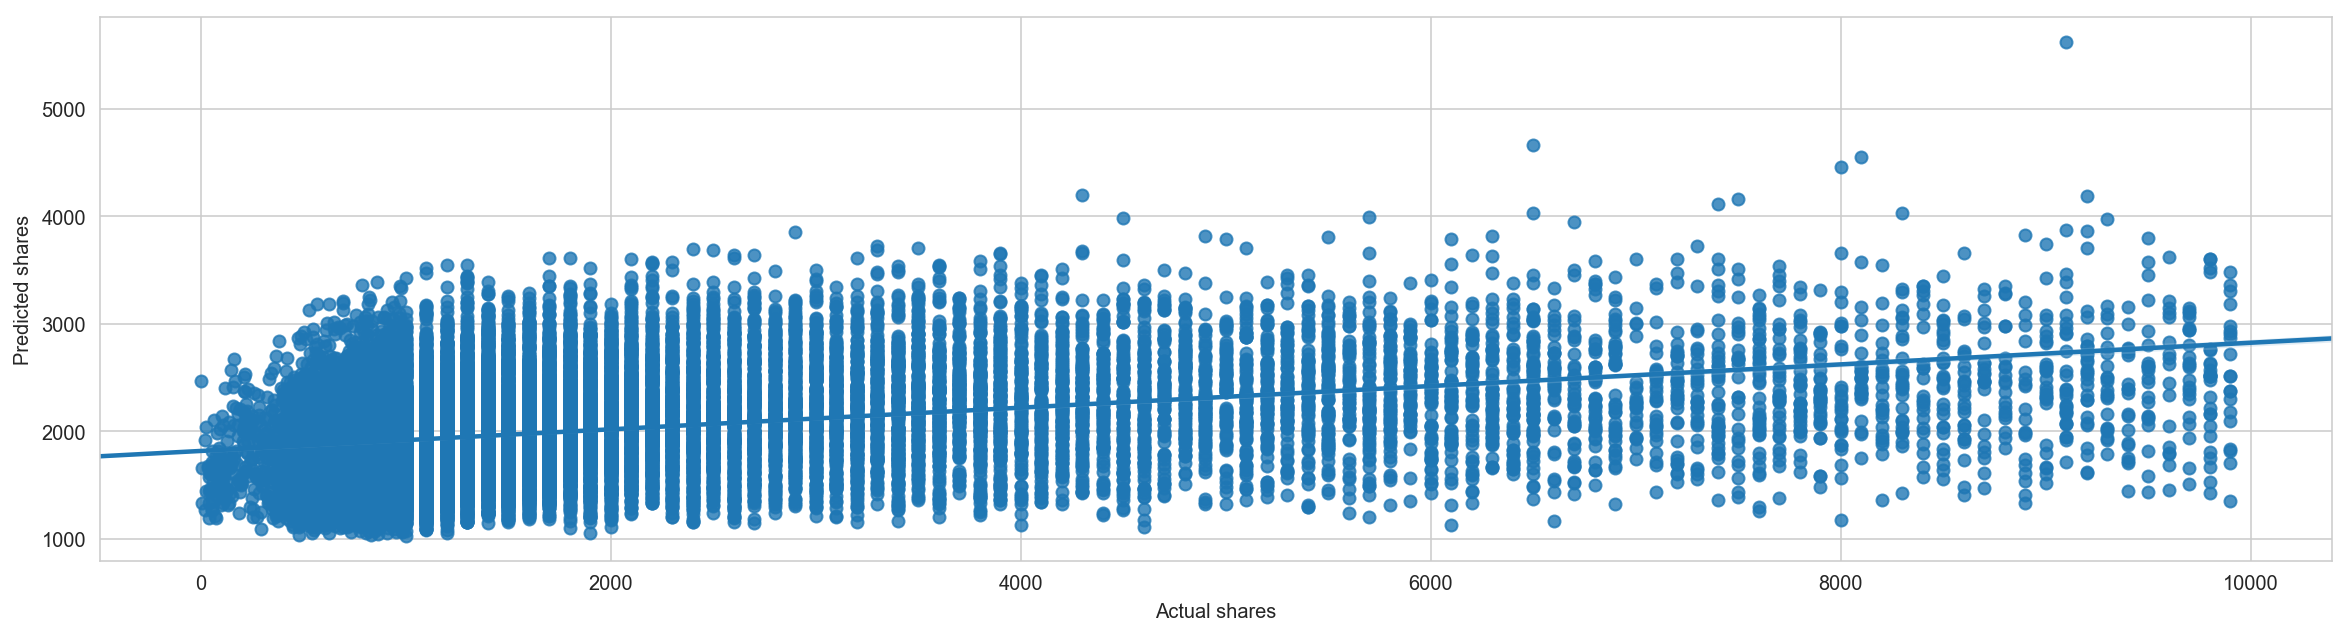

In [616]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_xgb_train_pca["Actual shares"], y=df_samples_xgb_train_pca["Predicted shares"])

In [617]:
#RMSE of the random forrest model using cross validation 
scores_xgb_pca = cross_val_score(xgb_model_pca, X_train_pca, y_train_pca,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_xgb_pca = np.sqrt(-scores_xgb_pca)
print(rmse_scores_xgb_pca)

[07:19:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:19:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:19:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:19:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:19:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:19:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:20:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:20:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:20:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:20:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1627.31196352 1682.54868962 1643.26780736 1774.47028729 1752.63809128
 1688.11062698 1638.56257745 1606.77464747 1759.8894606  1610.91957801]


In [618]:
print(rmse_scores_xgb_pca.mean())

1678.4493729579128


The best score so far :D

In [619]:
#RMSE and MAE for XGBoost model using train set

share_predictions_xgb_train_pca = xgb_model_pca.predict(X_train_pca)
xgb_mse_train_pca = mean_squared_error(y_train_pca, share_predictions_xgb_train_pca)
xgb_rmse_train_pca = np.sqrt(rf_mse_train_pca)
print(xgb_rmse_train_pca)

xgb_mae_train_pca = mean_absolute_error(y_train_pca, share_predictions_xgb_train_pca)
print(xgb_mae_train_pca)

760.8932990419988
1136.0822605535109


In [620]:
#We test how the model perform in the train_set. 
df_samples_xgb_test_pca = pd.DataFrame(data={"Predicted shares":xgb_model_pca.predict(X_test_pca),"Actual shares":list(y_test_pca)})
df_samples_xgb_test_pca.head()

Predicted shares  Actual shares
0       1482.863159           1600
1       1614.710815           1400
2       1707.350464           1900
3       2400.589111           3400
4       1444.797607            736

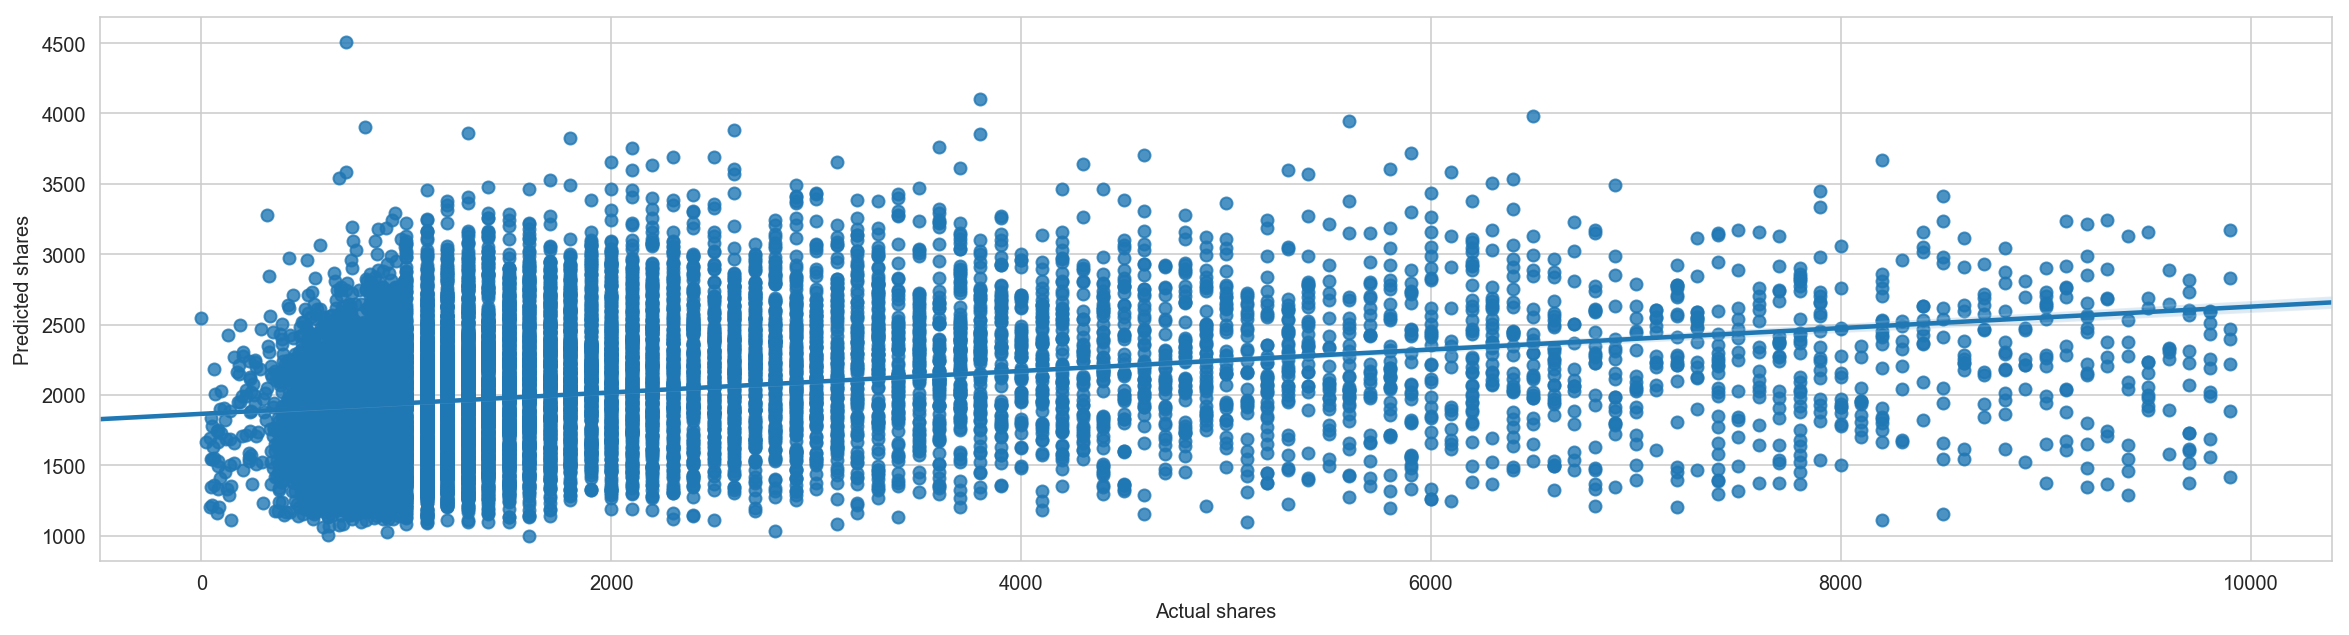

In [621]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_xgb_test_pca["Actual shares"], y=df_samples_xgb_test_pca["Predicted shares"])

In [622]:
#RMSE and MAE for XGBoost model using test set

share_predictions_xgb_test_pca = xgb_model_pca.predict(X_test_pca)
xgb_mse_test_pca = mean_squared_error(y_test_pca, share_predictions_xgb_test_pca)
xgb_rmse_test_pca = np.sqrt(rf_mse_test_pca)
print(xgb_rmse_test_pca)

xgb_mae_test_pca = mean_absolute_error(y_test_pca, share_predictions_xgb_test_pca)
print(xgb_mae_test_pca)

1801.2026724142424
1168.6058343086836


The same observation as we did with the random forrst model, but this model is better if we compare the rmse calculated with the cross validation method

# Using the important variables 

In [624]:
X_train, X_test, y_train, y_test = train_test_split(X_import, y, test_size=0.33, random_state=42)

In [ ]:
X_orig=data2[list(data2[all_columns[2:60]])]
X_train, X_test, y_train, y_test = train_test_split(X_import, y, test_size=0.33, random_state=42)

In [625]:
# Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#fit the data to the model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [626]:
df_samples_linreg_train = pd.DataFrame(data={"Predicted shares":linreg.predict(X_train),"Actual shares":list(y_train)})
df_samples_linreg_train.head()

Predicted shares  Actual shares
0       1633.193464           1200
1       2456.162123           1600
2       2089.483042            660
3       2479.285139           1200
4       1831.787581            913

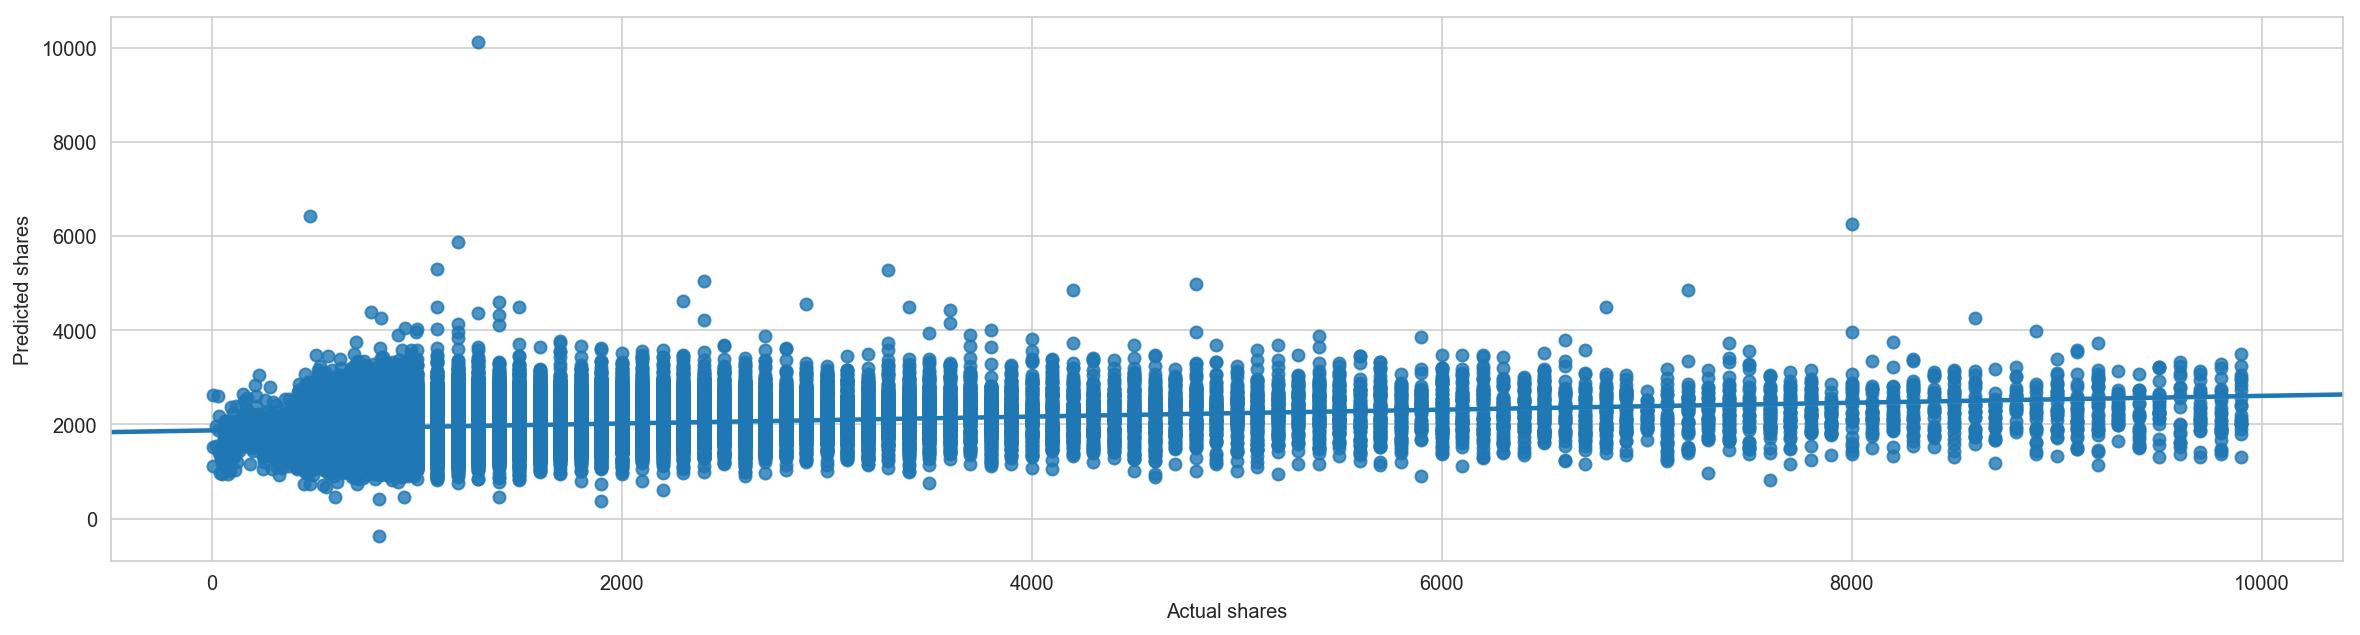

In [627]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_linreg_train["Actual shares"], y=df_samples_linreg_train["Predicted shares"])

In [628]:
#RMSE for this model in the train set
share_predictions_linreg = linreg.predict(X_train)
linreg_mse = mean_squared_error(y_train, share_predictions_linreg)
linreg_rmse = np.sqrt(linreg_mse)
linreg_rmse

1687.9651910732964

In [629]:
#MAE
linreg_mae = mean_absolute_error(y_train, share_predictions_linreg)
print(linreg_mae)

1174.3842172607096


In [630]:
df_samples_linreg_test = pd.DataFrame(data={"Predicted shares":linreg.predict(X_test),"Actual shares":list(y_test)})
df_samples_linreg_test.head()

Predicted shares  Actual shares
0       1491.175019           1600
1       1535.791902           1400
2       1806.318977           1900
3       2602.617920           3400
4       1243.077563            736

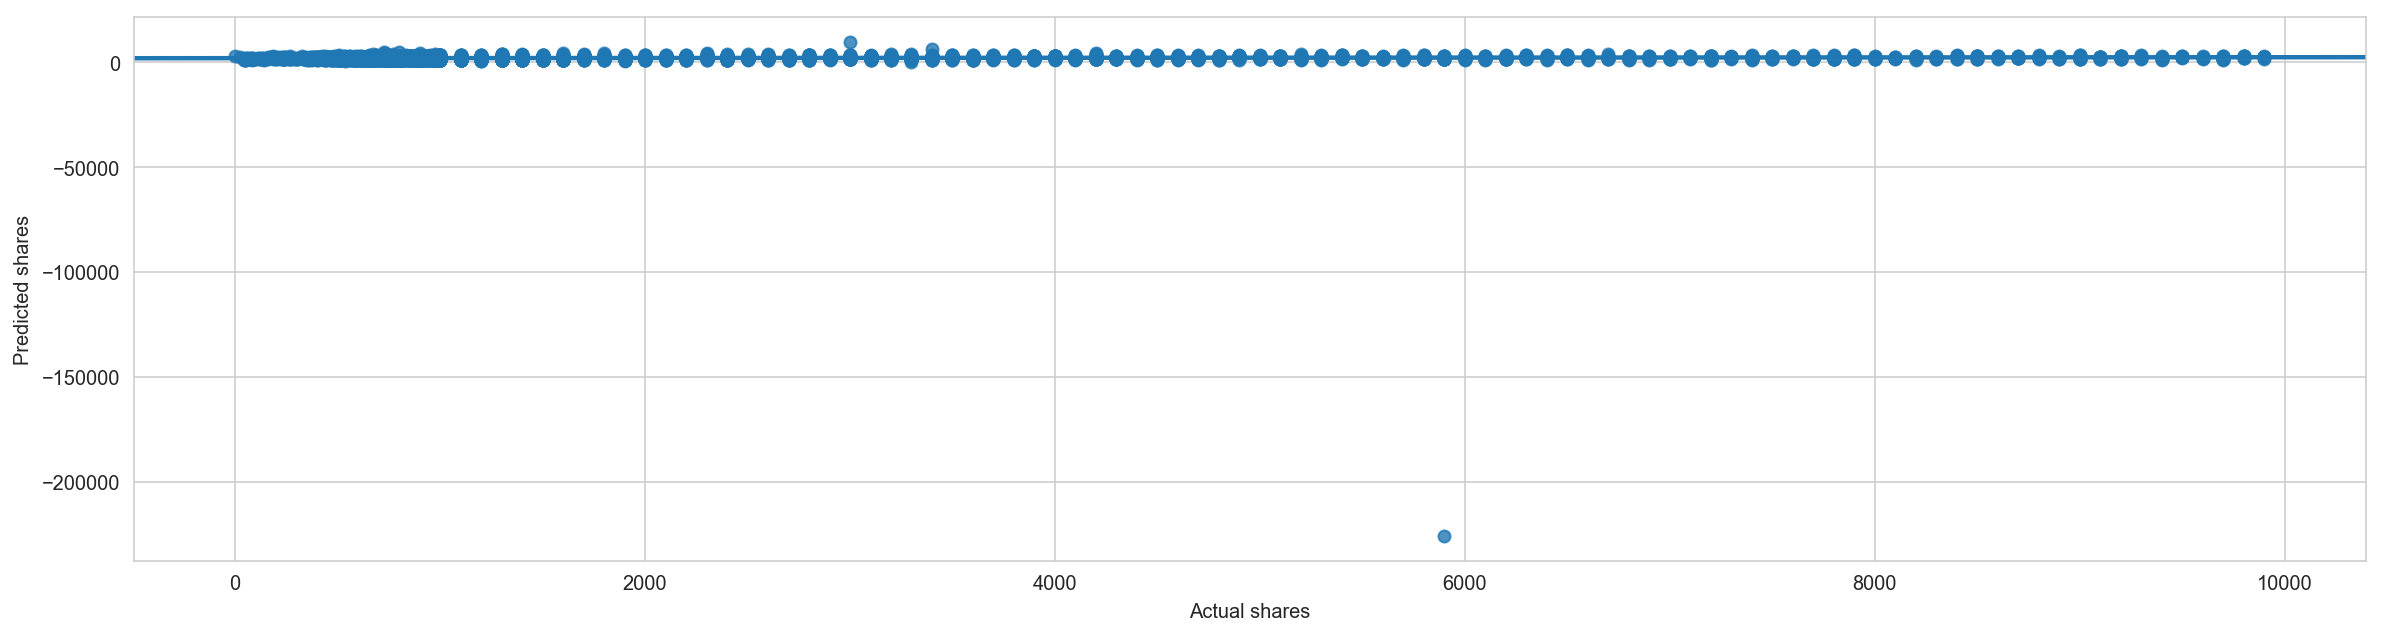

In [631]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_linreg_test["Actual shares"], y=df_samples_linreg_test["Predicted shares"])

In [632]:
#the RMSE and  for the samples from the test_set
share_predictions = linreg.predict(X_test)
linreg_mse = mean_squared_error(y_test, share_predictions)
linreg_rmse_test = np.sqrt(linreg_mse)
linreg_rmse_test

2695.3616031618512

In [633]:
#MAE
linreg_mae = mean_absolute_error(y_train, share_predictions_linreg)
print(linreg_mae)

1174.3842172607096


In [634]:
scores_linreg = cross_val_score(linreg, X_orig, y, cv=30, scoring='neg_mean_squared_error')
print(scores_linreg)

[ -2703151.69925636  -2707041.3678129   -2867003.91046515
  -2926858.13044105  -3021635.81409433  -3035275.95166364
  -2784810.48244787  -2982996.81068552  -2729751.36686264
  -2982476.02651321  -3015920.92869465  -2663836.51456223
  -3153929.1094988   -3744718.80550531  -3323012.11329118
  -3362673.06427842  -3013935.28798563  -2979621.76547223
  -2820130.11610373  -2728626.76474786  -2149040.94673065
  -2391821.82898858  -2688991.57045485 -26126925.66389493
  -2616360.90004809  -2564451.67637773  -2258020.97609321
  -2301329.86244306  -2469052.01932452  -2729265.62912662]


In [635]:
rmse_scores_linreg = np.sqrt(-scores_linreg)
print(rmse_scores_linreg.mean())

1790.1563291887776


From these results, we can conclude that the methode of choosing important variables is better than PCA for this problem, because at least the linear regression didnt overfitt the data that much as it did with PCA and the cross validation score is better

# Random Forrest model 

In [636]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

C:\Users\Yassine\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [637]:
some_X_train = X_train
some_y_train = y_train

#We test how the model perform in the train_set. 
df_samples_rf_train = pd.DataFrame(data={"Predicted shares":rf.predict(some_X_train),"Actual shares":list(some_y_train)})
df_samples_rf_train.head()

Predicted shares  Actual shares
0            1049.6           1200
1            2061.2           1600
2             964.0            660
3            1940.0           1200
4             944.8            913

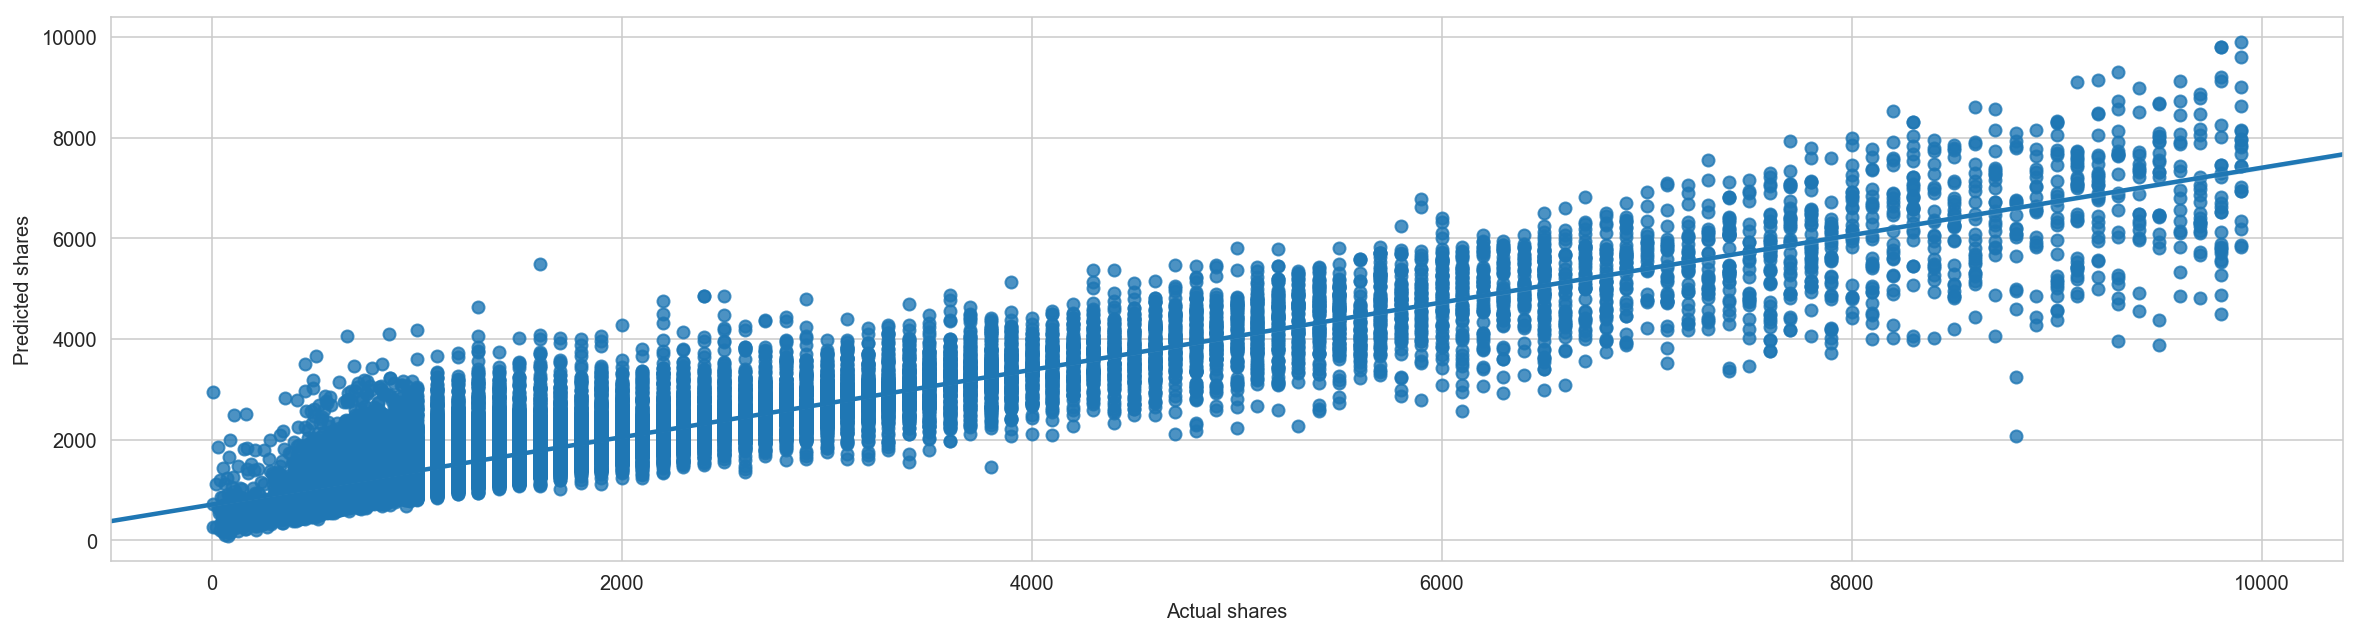

In [638]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_rf_train["Actual shares"], y=df_samples_rf_train["Predicted shares"])

In [639]:
#RMSE of the random forrest model using cross validation 
scores_rf = cross_val_score(rf, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_rf = np.sqrt(-scores_rf)
print(rmse_scores_rf)

[1722.74631986 1788.71037053 1752.30370735 1864.4007929  1840.70680412
 1783.67376485 1754.57134002 1714.78316098 1839.55814992 1747.9927784 ]


In [640]:
print(rmse_scores_rf.mean())

1780.9447188941165


In [641]:
#RMSE and MAE for Random forrest model using train set

share_predictions_rf_train = rf.predict(X_train)
rf_mse_train = mean_squared_error(y_train, share_predictions_rf_train)
rf_rmse_train = np.sqrt(rf_mse_train)
print(rf_rmse_train)

rf_mae_train = mean_absolute_error(y_train, share_predictions_rf_train)
print(rf_mae_train)


758.4743045587755
495.4470311440762


In [642]:
#RMSE and MAE for Random forrest model using test set

share_predictions_rf_test = rf.predict(X_test)
rf_mse_test = mean_squared_error(y_test, share_predictions_rf_test)
rf_rmse_test = np.sqrt(rf_mse_test)
print(rf_rmse_test)

rf_mae_test = mean_absolute_error(y_test, share_predictions_rf_test)
print(rf_mae_test)

1783.7965763568836
1257.8539183937824


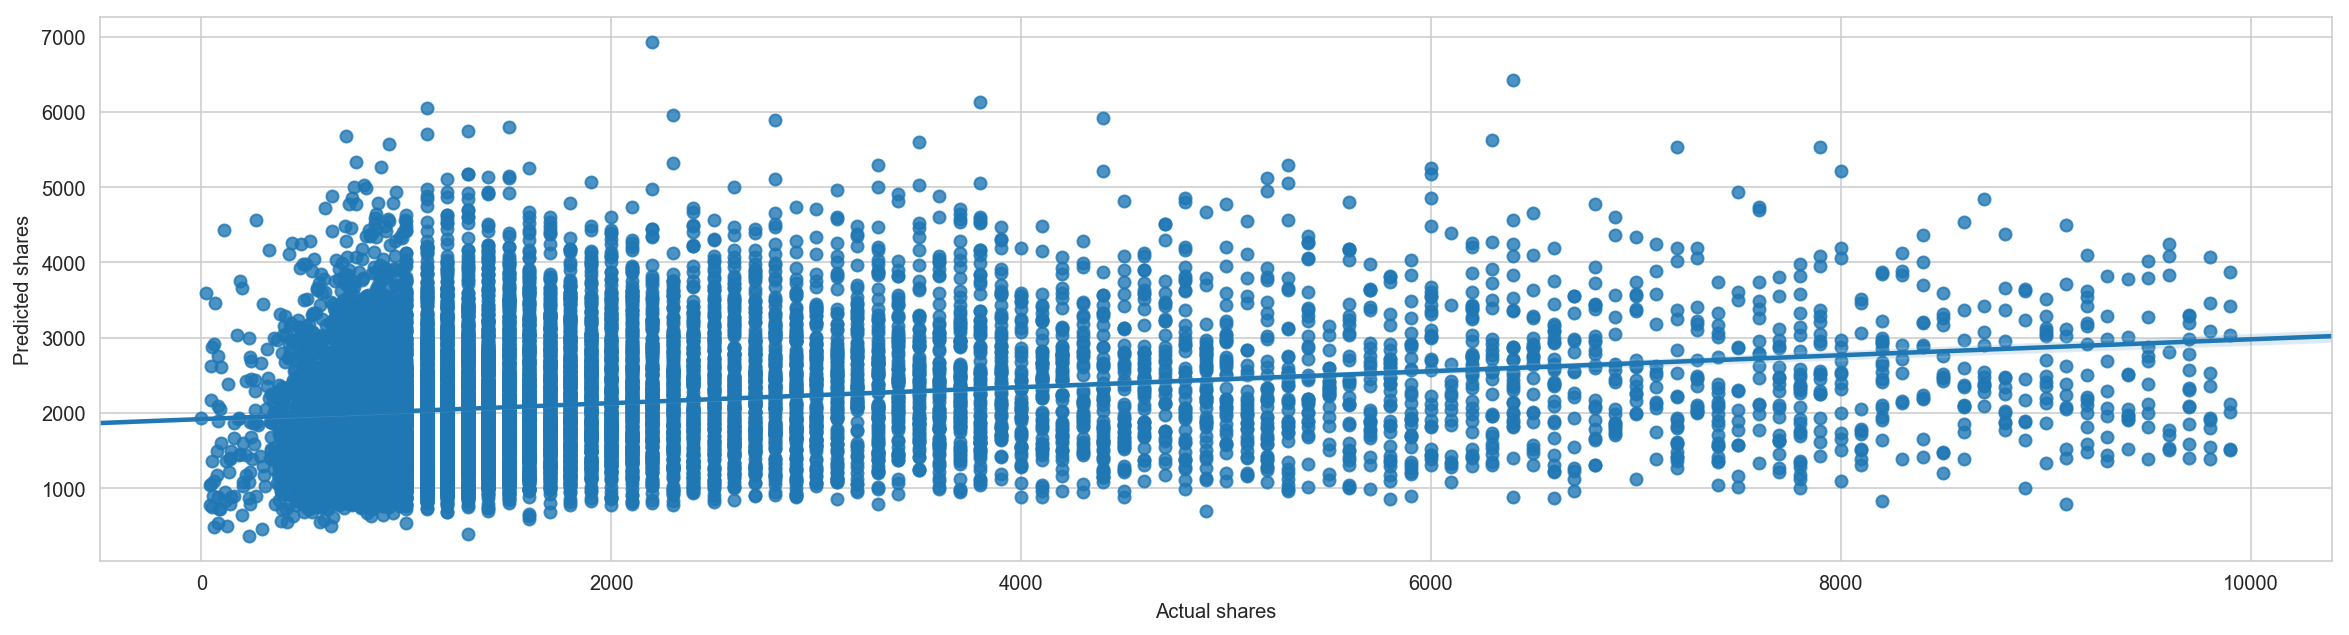

In [643]:
some_X_test = X_test
#some_y_test = y_test.iloc[:500]
some_y_test = y_test

#We test how the model perform in the train_set. 
df_samples_rf_test = pd.DataFrame(data={"Predicted shares":rf.predict(some_X_test),"Actual shares":list(some_y_test)})
df_samples_rf_test.head()

f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_rf_test["Actual shares"], y=df_samples_rf_test["Predicted shares"])

# XGBoost model

In [644]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

some_X_train = X_train
some_y_train = y_train

C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:27:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [645]:
#We test how the model perform in the train_set. 
df_samples_xgb_train = pd.DataFrame(data={"Predicted shares":xgb_model.predict(some_X_train),"Actual shares":list(some_y_train)})
df_samples_xgb_train.head()

Predicted shares  Actual shares
0       1278.319092           1200
1       2226.671631           1600
2       2473.997314            660
3       2616.576172           1200
4       1410.575562            913

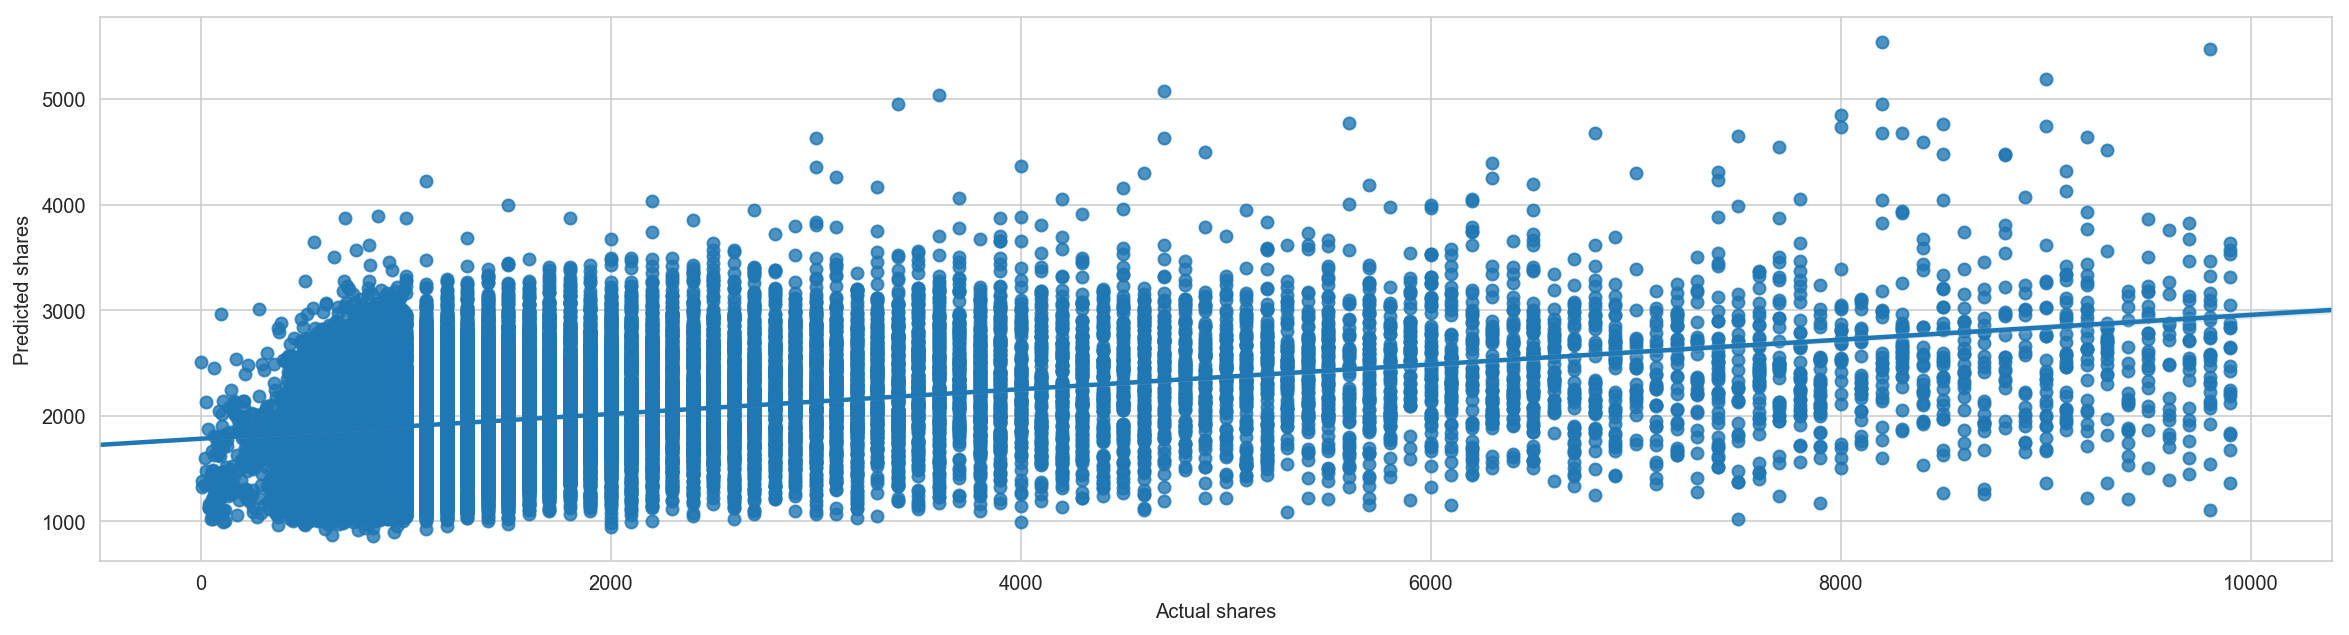

In [646]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_xgb_train["Actual shares"], y=df_samples_xgb_train["Predicted shares"])

In [647]:
#RMSE of the random forrest model using cross validation 
scores_xgb = cross_val_score(xgb_model, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_xgb = np.sqrt(-scores_xgb)
print(rmse_scores_xgb)

[07:27:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:27:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Yassine\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:28:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1610.88266022 1669.03917674 1627.55235106 1752.18288736 1747.76688084
 1672.32004476 1624.59654156 1596.83328923 1742.33536769 1617.09927882]


In [648]:
print(rmse_scores_xgb.mean())

1666.0608478274444


In [649]:
#RMSE and MAE for XGBoost model using train set

share_predictions_xgb_train = xgb_model.predict(X_train)
xgb_mse_train = mean_squared_error(y_train, share_predictions_xgb_train)
xgb_rmse_train = np.sqrt(rf_mse_train)
print(xgb_rmse_train)

xgb_mae_train = mean_absolute_error(y_train, share_predictions_xgb_train)
print(xgb_mae_train)

758.4743045587755
1122.2014181233908


In [650]:
some_X_test = X_test
some_y_test = y_test

#We test how the model perform in the train_set. 
df_samples_xgb_test = pd.DataFrame(data={"Predicted shares":xgb_model.predict(some_X_test),"Actual shares":list(some_y_test)})
df_samples_xgb_test.head()


Predicted shares  Actual shares
0       1518.419067           1600
1       1523.480591           1400
2       1870.063965           1900
3       2561.123291           3400
4       1363.661377            736

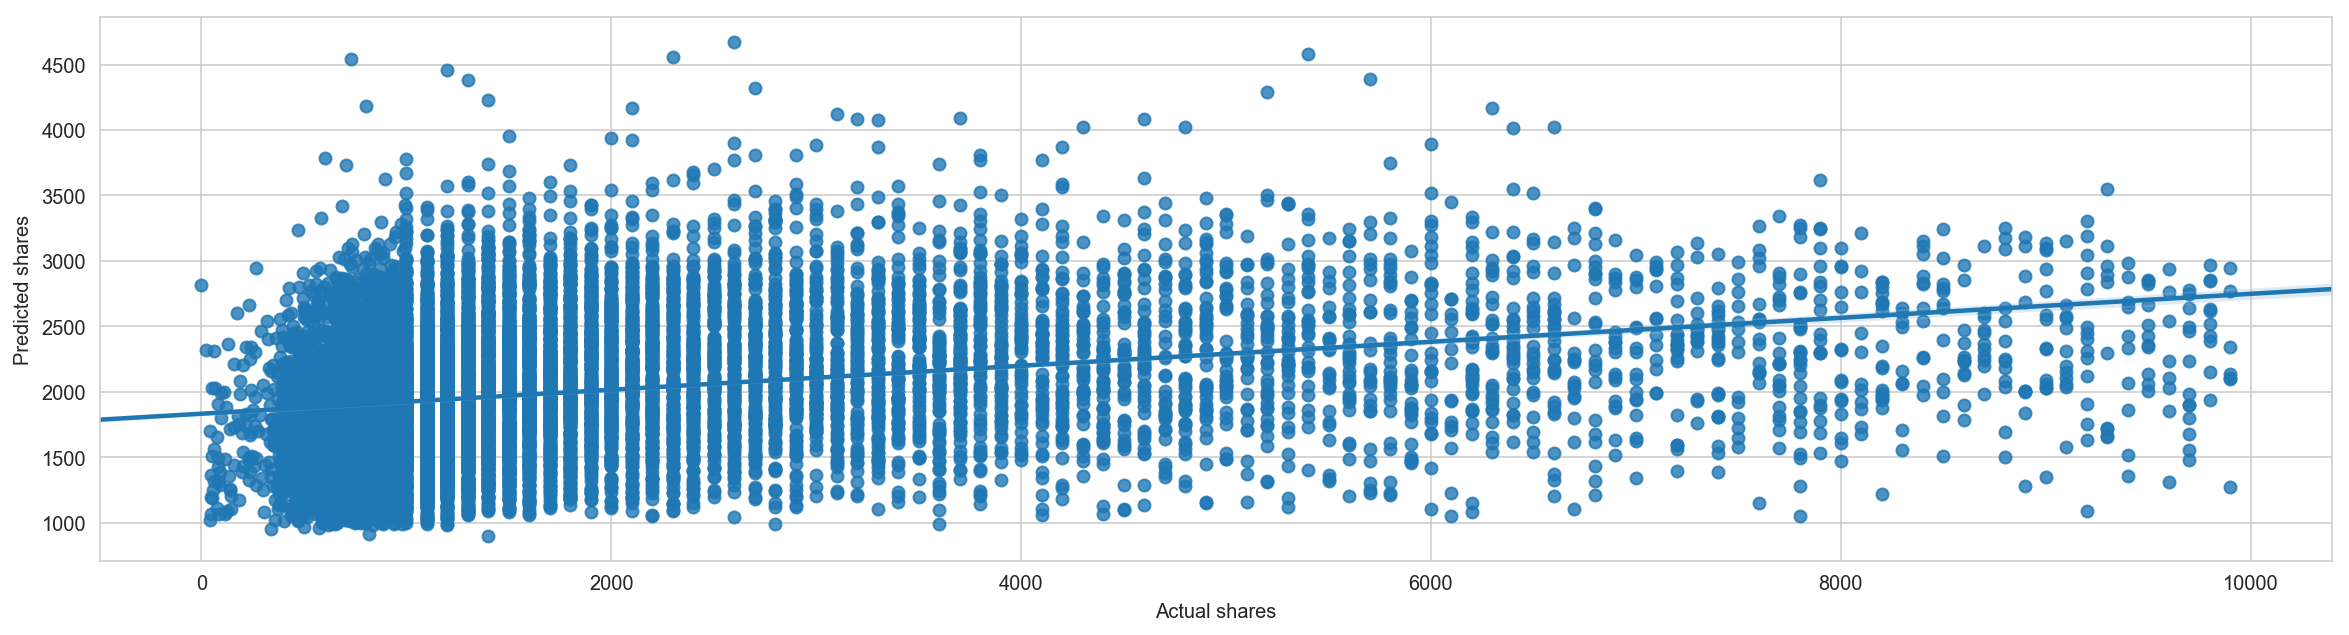

In [651]:
#We can also plot the samples in seaborn
f, ax = plt.subplots(figsize=(20, 5))
sns.regplot(x=df_samples_xgb_test["Actual shares"], y=df_samples_xgb_test["Predicted shares"])

In [652]:
#RMSE and MAE for XGBoost model using test set

share_predictions_xgb_test = xgb_model.predict(X_test)
xgb_mse_test = mean_squared_error(y_test, share_predictions_xgb_test)
xgb_rmse_test = np.sqrt(rf_mse_test)
print(xgb_rmse_test)

xgb_mae_test = mean_absolute_error(y_test, share_predictions_xgb_test)
print(xgb_mae_test)

1783.7965763568836
1158.4000392182504


# Comparing the models 

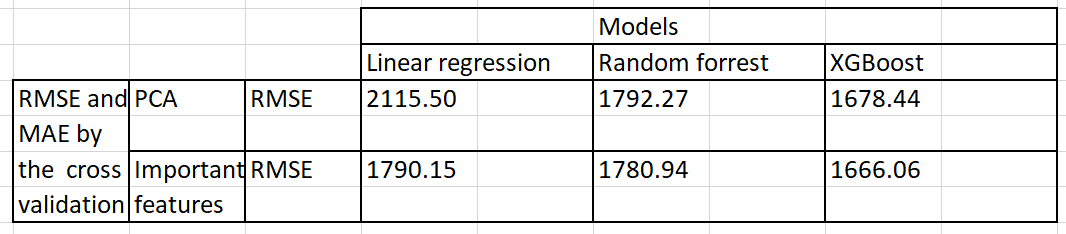

In [654]:
from IPython.display import Image
Image(filename='Capture3.png',width=1000, height=1000)

By the way I used the timedelta in prediction because the results were better than letting it aside.

# Conclusion

Even if I could reduce the Error as much as it was possible for me, I couldnt have that really good r2 score (0.18 for the XGBoost model). Many things could be done or provided to maximize this r2 score or minimize the RMSE:
- having more data in term of articles that are not just outliers
- choosing features in a precise way: after choosing the best model (XGBoost) we can plot the the cross validation score by the number of features we choose every time (in order by the coefficient of importance)

# Perspective 

- Another Idea to do prediction is to convert the shares_log into 1 and 0 values ( 1 for shares_log>mean(shares_log) and 0 for shares_log<mean(shares_log) ) so we can deal with a classification problem 
- The url colonne could serve us in another perspective, we could use the name of the company to do prediction. I'm pretty sure that if I extracted the names of company and vectorize it into numpy arrays, I could use it to have better predictions